In [ ]:
# How many fail entirely becuase the planet doesn't query?
# How many skip all the transits?
# For how many are the transits too shallow? --> 0, by construction
# What fraction of stuff gets flagged for each one?

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shutil
#from PIL import Image
from IPython.display import Image, display

Kepler-1655 b
missing flag:Kepler-1655 b/transit_plots/Kepler-1655 b_t17.0.png
missing flag:Kepler-1655 b/transit_plots/Kepler-1655 b_t22.0.png
ttv flag:Kepler-1655 b/transit_plots/Kepler-1655 b_t52.0.png
Kepler-424 b
ttv flag:Kepler-424 b/transit_plots/Kepler-424 b_t211.0.png
ttv flag:Kepler-424 b/transit_plots/Kepler-424 b_t260.0.png
ttv flag:Kepler-424 b/transit_plots/Kepler-424 b_t345.0.png
Kepler-1 b
ttv flag:Kepler-1 b/transit_plots/Kepler-1 b_t0.0.png
ttv flag:Kepler-1 b/transit_plots/Kepler-1 b_t226.0.png
ttv flag:Kepler-1 b/transit_plots/Kepler-1 b_t436.0.png
Kepler-1656 b
Kepler-229 c
Kepler-1642 b
An unkown error occured and this planet failed to run.
Kepler-493 b
ttv flag:Kepler-493 b/transit_plots/Kepler-493 b_t50.0.png
ttv flag:Kepler-493 b/transit_plots/Kepler-493 b_t221.0.png
Kepler-51 d
Kepler-725 b
Kepler-126 d
Kepler-1658 b
Kepler-491 b
Kepler-63 b
Kepler-138 c
Kepler-506 b
depth flag:Kepler-506 b/transit_plots/Kepler-506 b_t189.0.png
ttv flag:Kepler-506 b/transit_pl

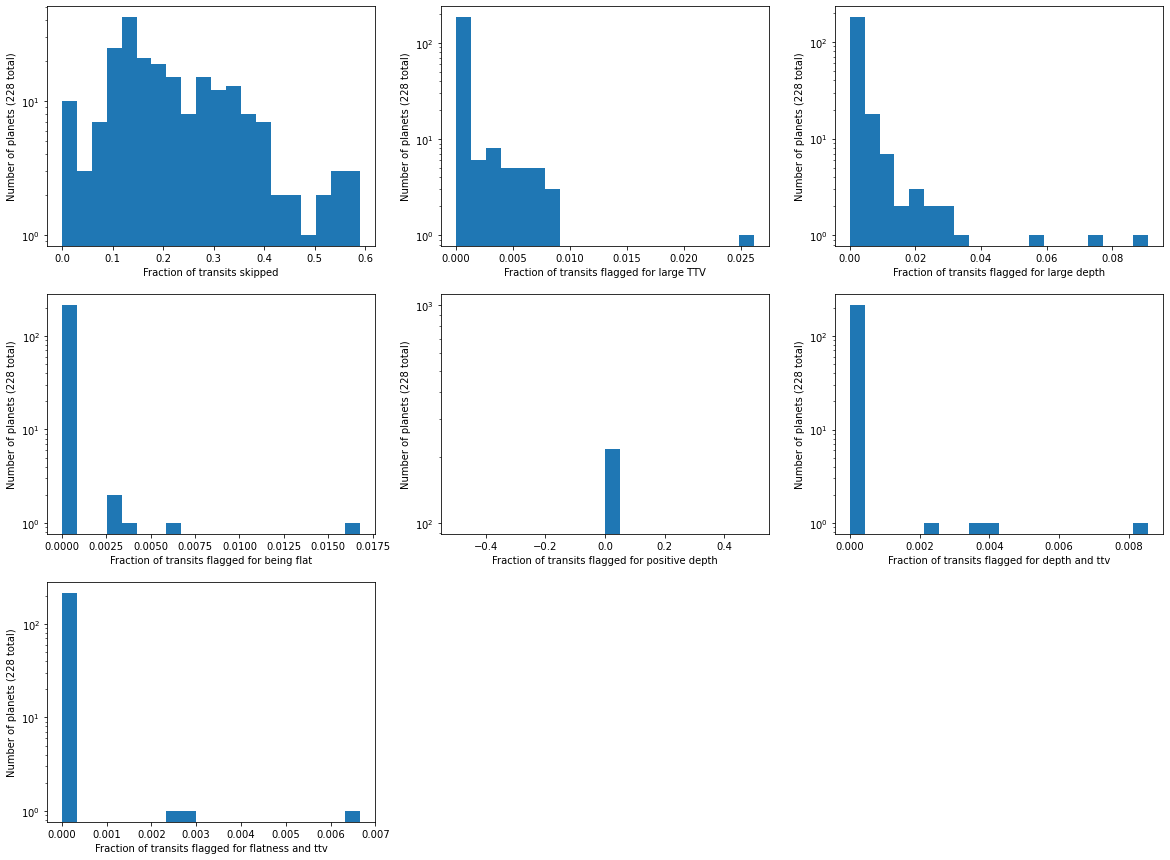

In [76]:
#directory = 'Batman_outputs_228_5-30-22'
directory = 'Batman_outputs_228_6-19-22'
dir_list = os.listdir(directory)
master_list = pd.read_csv('Complete_target_table.csv')
try:
    dir_list.remove('.ipynb_checkpoints')
    dir_list.remove('old')
except:
    pass

num_skipped_arr = []
failed_arr = []
failed_star_arr = []
too_shallow_arr = []
periods = np.zeros(len(dir_list)) * np.nan
frac_skipped_arr = np.zeros(len(dir_list)) * np.nan
frac_flagged_depth = np.zeros(len(dir_list)) * np.nan
frac_flagged_pos_depth = np.zeros(len(dir_list)) * np.nan
frac_flagged_flat = np.zeros(len(dir_list)) * np.nan
frac_flagged_ttv = np.zeros(len(dir_list)) * np.nan
frac_flagged_ttv_and_flat = np.zeros(len(dir_list)) * np.nan
frac_flagged_ttv_and_depth = np.zeros(len(dir_list)) * np.nan
num_transits = np.zeros(len(dir_list)) * np.nan
num_ttv_flag = np.zeros(len(dir_list)) * np.nan
num_depth_flag = np.zeros(len(dir_list)) * np.nan
num_flat_flag = np.zeros(len(dir_list)) * np.nan
num_depth_and_ttv_flag = np.zeros(len(dir_list)) * np.nan
num_flat_and_ttv_flag = np.zeros(len(dir_list)) * np.nan
mean_flux_err = np.zeros(len(dir_list)) * np.nan
expected_depth = np.zeros(len(dir_list)) * np.nan
depth_err_ratio = np.zeros(len(dir_list)) * np.nan
has_flag = np.zeros(len(dir_list)) 
has_ttv_flag = np.zeros(len(dir_list)) 
has_depth_flag = np.zeros(len(dir_list)) 
has_flat_flag = np.zeros(len(dir_list)) 
all_flat_flags = np.empty(shape=(0, ))
all_BIC = np.empty(shape=(0, ))
planets = []
planets_flagged = [] # planets flagged for any reason

unique_stars = list(set(directory.split(' ')[0] for directory in dir_list))
#i = 0
for i in range(len(dir_list)): 
    #print(planet)
    planet_dir = dir_list[i]
    planet = planet_dir
    print(planet)
    #planets += [planet]
   # if planet == 'Kepler-1642 b_28May2022-10:03:28': continue
    if os.path.isfile(directory + '/' + planet_dir + '/Log.txt'):
        #print('Batman_outputs_236/' + planet_dir + '/Log.txt')
        failed_arr += [planet]
        failed_star_arr += [planet.split(' ')[0]]
        file = open(directory + '/' + planet_dir + '/Log.txt')
        error = file.read()
        print(error)
        if 'depth' in error:
            too_shallow_arr += [planet]
        #print(error)
        continue
    results = pd.read_csv(directory + '/' + planet_dir + '/Fit_data_' + planet + '.csv', skipfooter = 12, engine='python')
    expected_params = pd.read_csv(directory + '/' + planet_dir + '/Fit_data_' + planet + '.csv', skiprows = len(results) + 6, skipfooter = 4, engine='python')
    periods[i] = expected_params['period'] 
    master_list_row = master_list[master_list['Kepler_name'] == planet]
    mean_flux_err[i] = master_list_row['Mean_flux_err']
    expected_depth[i] = master_list_row['Expected_depth']
    depth_err_ratio[i] = master_list_row['Depth_err_ratio']
    transit_times = np.array(results['Fit_transit_times']) 
    depth_flag = np.array(results['Large_depth_flag']) 
    pos_depth_flag = np.array(results['Positive_depth_flag']) 
    flat_flag = np.array(results['Flat_curve_flag']) 
    ttv_flag = np.array(results['Large_TTV_flag']) 
    BIC = np.array(results['BIC']) 
    fit_ttv = np.array(results['Fit_depths'])
    fit_depth = np.array(results['Fit_transit_times']) 
    num_transits[i] = len(transit_times)
    num_ttv_flag[i] = len(np.where(ttv_flag == 1)[0])
    num_depth_flag[i] = len(np.where(depth_flag == 1)[0])
    num_flat_flag[i] = len(np.where(flat_flag == 1)[0])
    num_depth_and_ttv_flag[i] = len(np.where((ttv_flag == 1) * (depth_flag == 1))[0])
    num_flat_and_ttv_flag[i] = len(np.where((ttv_flag == 1) * (flat_flag == 1))[0])
    frac_skipped = len(np.where(transit_times == -1)[0]) / len(transit_times)
    frac_skipped_arr[i] = frac_skipped
    frac_flagged_ttv[i] = len(np.where(ttv_flag == 1)[0]) / len(ttv_flag)
    frac_flagged_depth[i] = len(np.where(depth_flag == 1)[0]) / len(depth_flag)
    frac_flagged_pos_depth[i] = len(np.where(pos_depth_flag == 1)[0]) / len(pos_depth_flag)
    frac_flagged_flat[i] = len(np.where(flat_flag == 1)[0]) / len(flat_flag)
    frac_flagged_ttv_and_flat[i] = len(np.where((flat_flag == 1) * (ttv_flag == 1))[0]) / len(flat_flag)
    frac_flagged_ttv_and_depth[i] = len(np.where((depth_flag == 1) * (ttv_flag == 1))[0]) / len(flat_flag)
    all_flat_flags = np.hstack([all_flat_flags, flat_flag])
    all_BIC = np.hstack([all_BIC, BIC])

    plot_flags = False
    if plot_flags:
        plot_path = directory + '/' + planet_dir + '/flags_plot.png'
        display(Image(filename=plot_path))   
    
    if frac_flagged_ttv[i] > 0: 
        has_ttv_flag[i] = 1
        has_flag[i] = 1
    if frac_flagged_depth[i] > 0: 
        has_depth_flag[i] = 1
        has_flag[i] = 1
    if frac_flagged_flat[i] > 0: 
        has_flat_flag[i] = 1
        has_flag[i] = 1
    make_plots = True
    if make_plots:
        for j in range(len(transit_times)):
            if flat_flag[j]:
                planets_flagged += [planet]
                try:
                    if transit_times[j] != -1:
                        filename = planet_dir + '_t' + str(j) + '.0.png'
                        plot_path = directory + '/' + planet_dir + '/transit_plots/' + filename
                        #print(plot_path)
                    else:
                        filename = planet_dir + '_t' + str(j) + '.0_skipped.png'
                        plot_path = directory + '/' + planet_dir + '/transit_plots/' + filename
                    #display(Image(filename=plot_path))
                    #shutil.copy(plot_path, './Missing_flag_plots_5-30-22/' + filename)
                    print('missing flag:' +  planet_dir + '/transit_plots/' + filename)
                except:
                    print('Could not find plot!')
            if ttv_flag[j]:
                planets_flagged += [planet]
                try:
                    if transit_times[j] != -1:
                        filename = planet_dir + '_t' + str(j) + '.0.png'
                        plot_path = directory + '/' + planet_dir + '/transit_plots/' + filename
                        #print(plot_path)
                    else:
                        filename = planet_dir + '_t' + str(j) + '.0_skipped.png'
                        plot_path = directory + '/' + planet_dir + '/transit_plots/' + filename
                    #display(Image(filename=plot_path))
                    #shutil.copy(plot_path, './TTV_flag_plots_5-30-22/' + filename)
                    print('ttv flag:' +  planet_dir + '/transit_plots/' + filename)                
                except:
                    print('Could not find plot!')
            if depth_flag[j]:
                planets_flagged += [planet]
                try:
                    if transit_times[j] != -1:
                        filename = planet_dir + '_t' + str(j) + '.0.png'
                        plot_path = directory + '/' + planet_dir + '/transit_plots/' + filename
                        #print(plot_path)
                    else:
                        filename = planet_dir + '_t' + str(j) + '.0_skipped.png'
                        plot_path = directory + '/' + planet_dir + '/transit_plots/' + filename
                    #display(Image(filename=plot_path))
                    #shutil.copy(plot_path, './Depth_flag_plots_5-30-22/' + filename)
                    print('depth flag:' +  planet_dir + '/transit_plots/' + filename)
                except:
                    print('Could not find plot!')
    #frac_depth_flagged_also_ttv_flagged = 
    #print(planet_dir)
    #print(np.where(depth_flag ==1))
    #print(np.where(ttv_flag ==1))
    #print(np.where((depth_flag == 1) * (ttv_flag == 1)))
    #print()
   #num_nan = len(np.where(np.isnan(transit_times)))
    #print(num_nan)
    #i += 1

print(str(len(failed_arr)) + ' planets failed to run, of ' + str(len(dir_list)) + ' total planets.')
print(str(len(list(set(failed_star_arr)))) + ' stars had at least one failed planet, of ' + str(len(unique_stars)) + ' total stars.')
print(str(len(np.where(frac_skipped_arr == 1)[0])) + ' planets had all transits skipped due to missing data.')
print(str(int(np.sum(num_transits[frac_skipped_arr == 1]))) + ' total transits were skipped over all planets.')

print()
print('Number of systems with at least one flag: ' + str(len(np.where(has_flag)[0])))

print('            with at least one depth flag: ' + str(len(np.where(has_depth_flag)[0])))
print('       number with at least one ttv flag: ' + str(len(np.where(has_ttv_flag)[0])))
print('                  number with both flags: ' + str(len(np.where(has_ttv_flag * has_depth_flag)[0])))


plt.figure(figsize = [20,15])
plt.subplot(331)
plt.hist(frac_skipped_arr, bins = 20)
plt.xlabel('Fraction of transits skipped'); plt.ylabel('Number of planets (' + str(len(dir_list)) + ' total)')
plt.yscale('log')
plt.subplot(332)
plt.hist(frac_flagged_ttv, bins = 20)
plt.xlabel('Fraction of transits flagged for large TTV'); plt.ylabel('Number of planets (' + str(len(dir_list)) + ' total)')
plt.yscale('log')
plt.subplot(333)
plt.hist(frac_flagged_depth, bins = 20)
plt.xlabel('Fraction of transits flagged for large depth'); plt.ylabel('Number of planets (' + str(len(dir_list)) + ' total)')
plt.yscale('log')
plt.subplot(334)
plt.hist(frac_flagged_flat, bins = 20)
plt.xlabel('Fraction of transits flagged for being flat'); plt.ylabel('Number of planets (' + str(len(dir_list)) + ' total)')
plt.yscale('log')
plt.subplot(335)
plt.hist(frac_flagged_pos_depth, bins = 20)
plt.xlabel('Fraction of transits flagged for positive depth'); plt.ylabel('Number of planets (' + str(len(dir_list)) + ' total)')
plt.yscale('log')
plt.subplot(336)
plt.hist(frac_flagged_ttv_and_depth, bins = 20)
plt.xlabel('Fraction of transits flagged for depth and ttv'); plt.ylabel('Number of planets (' + str(len(dir_list)) + ' total)')
plt.yscale('log')
plt.subplot(337)
plt.hist(frac_flagged_ttv_and_flat, bins = 20)
plt.xlabel('Fraction of transits flagged for flatness and ttv'); plt.ylabel('Number of planets (' + str(len(dir_list)) + ' total)')
plt.yscale('log')


#print(planets_flagged)

In [78]:
failed_arr

['Kepler-1642 b',
 'Kepler-951 b',
 'Kepler-1628 b',
 'Kepler-1446 b',
 'Kepler-1624 b',
 'Kepler-1625 b',
 'Kepler-1540 b',
 'Kepler-221 e',
 'Kepler-1520 b',
 'Kepler-297 c']

Total number transits: 39468.0
Number expected depth flag: 53.282
Number actual depth flag: 92.0

Number expected ttv flag: 0.022
Number actual ttv flag: 51.0


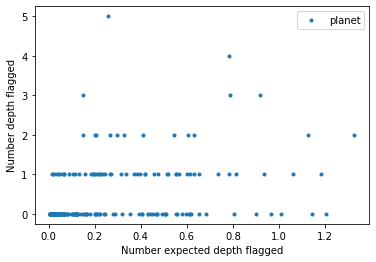

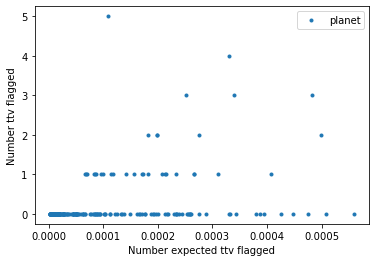

In [21]:
# do we flag the number expected for ttv and large depth which are purely based on N sigma above the mean
# large depths -- above 3 sigma above the mean should be (100 - 99.73)/2 = 0.135 percent (= 0.00135) of the datapoints, just by normal flucuations
# so out of 1000 we should get 1 flagged
N_expected = num_transits * 0.00135
plt.figure()
plt.plot(N_expected, num_depth_flag, '.', label = 'planet')
plt.xlabel('Number expected depth flagged'); plt.ylabel('Number depth flagged'); plt.legend()
# TTVs -- above 5 sigma away from the mean should be (100 - 99.999943) = 0.000057 percent (= 0.00000057) of the datapoints, just by normal flucuations
N_expected = num_transits * 0.00000057
plt.figure()
plt.plot(N_expected, num_ttv_flag, '.', label = 'planet')
plt.xlabel('Number expected ttv flagged'); plt.ylabel('Number ttv flagged'); plt.legend()

N_tot  = np.nansum(num_transits)
print('Total number transits: ' + str(N_tot))
print('Number expected depth flag: ' + str(np.round(N_tot * 0.00135,3)))
print('Number actual depth flag: ' + str(np.nansum(num_depth_flag)))
print()
print('Number expected ttv flag: ' + str(np.round(N_tot * 0.00000057,3)))
print('Number actual ttv flag: ' + str(np.nansum(num_ttv_flag)))

Kepler-1642 b: An unkown error occured and this planet failed to run.


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)

Kepler-951 b: An unkown error occured and this planet failed to run.


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)

Kepler-1628 b: An unkown error occured and this planet failed to run.


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)

Kepler-1446 b: The expected depth was less than twice the ligthcurve mean flux error so no fitting was attempted.Depth within lightcurve uncertainty means any fit depths would not be meaningful.
Kepler-1624 b: An unkown error occured and this planet failed to run.


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)

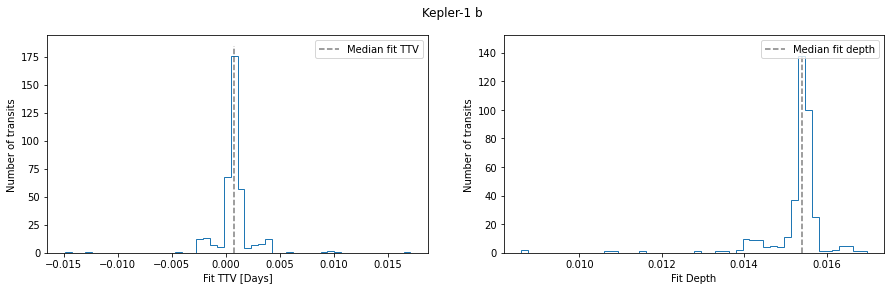

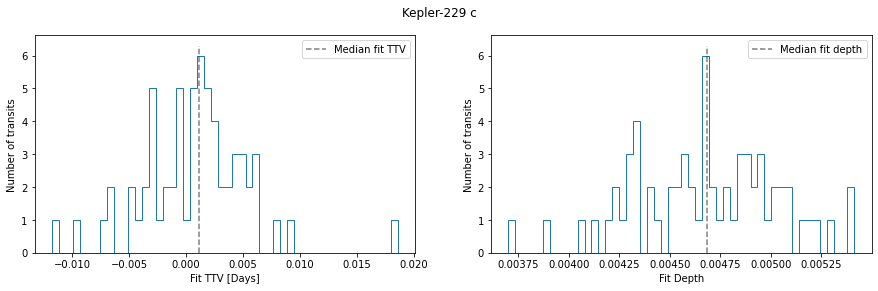

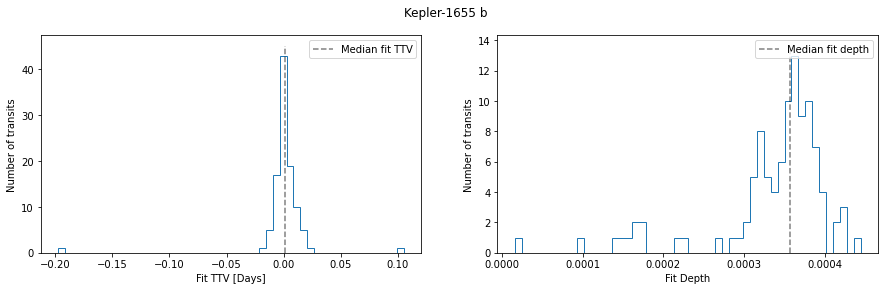

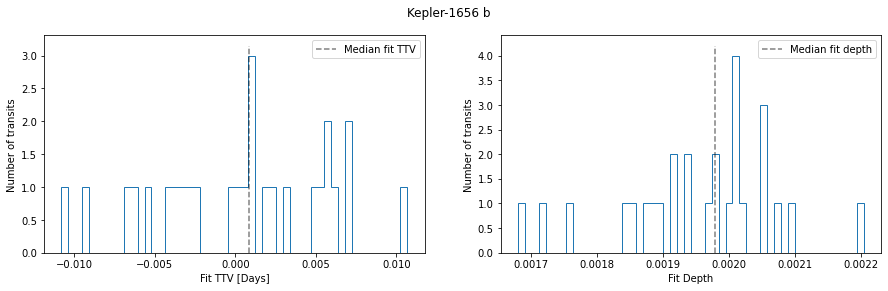

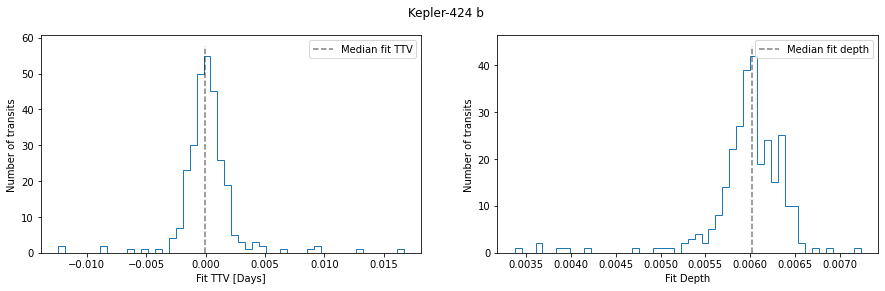

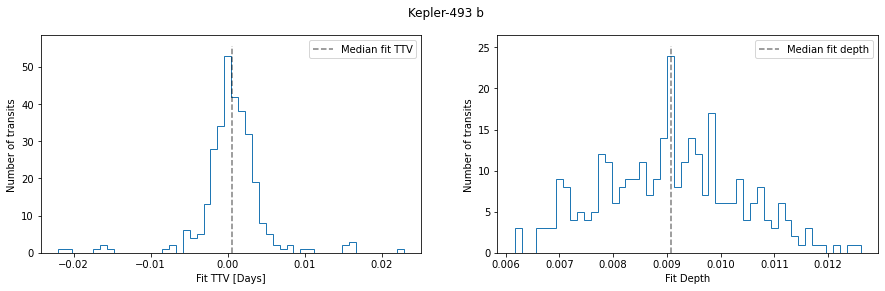

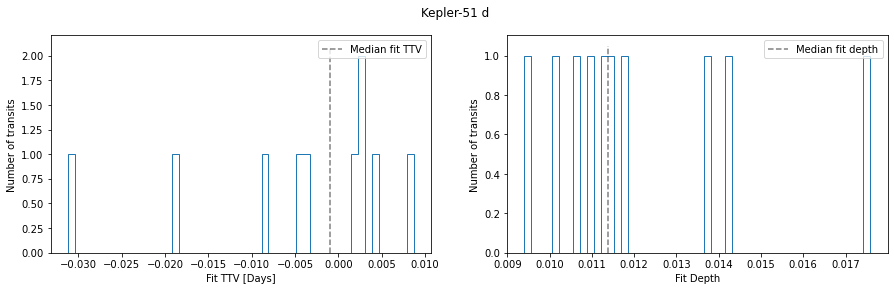

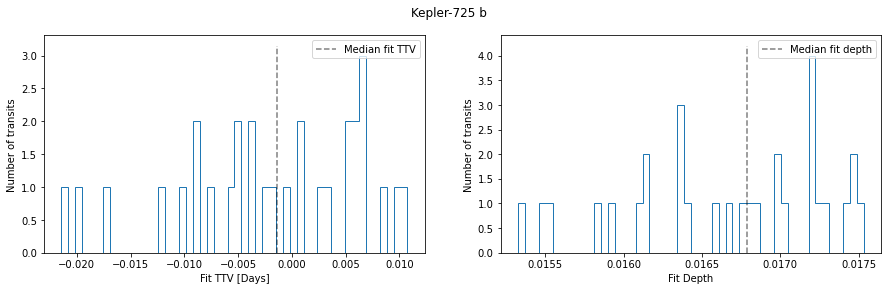

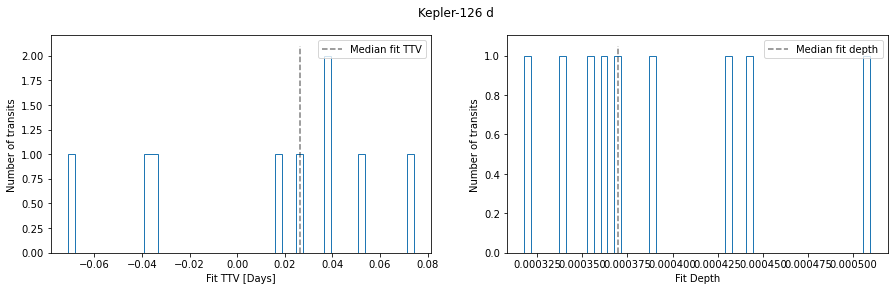

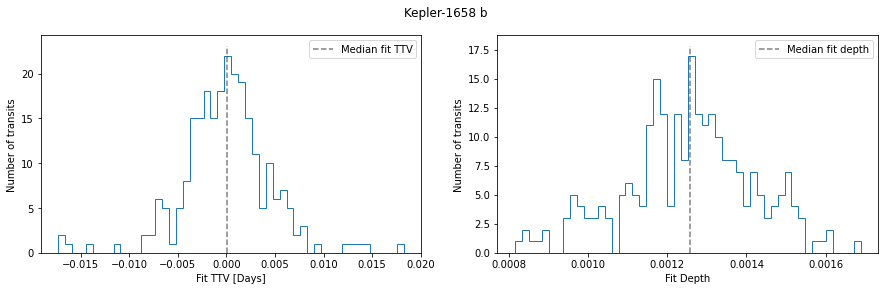

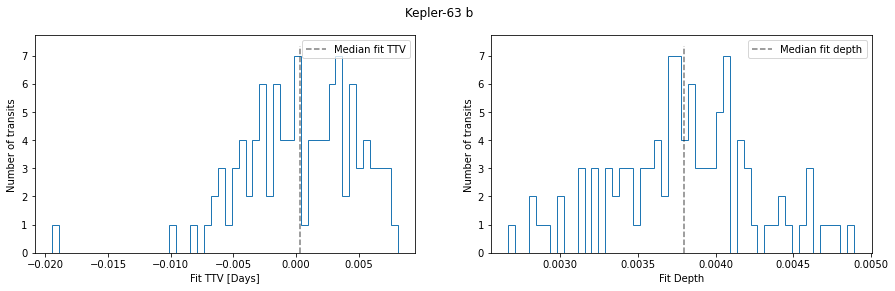

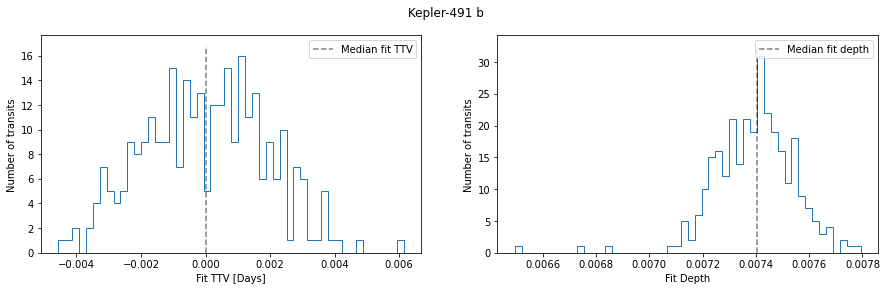

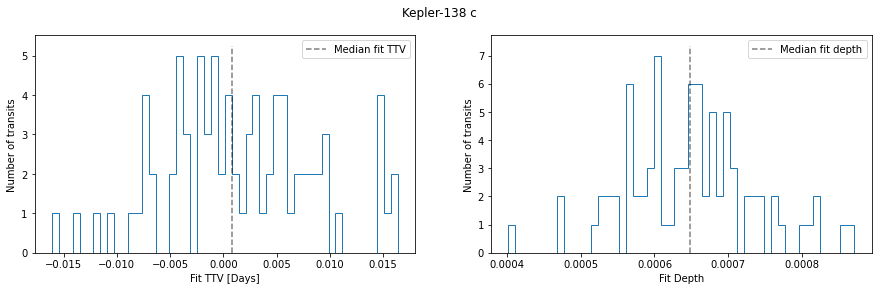

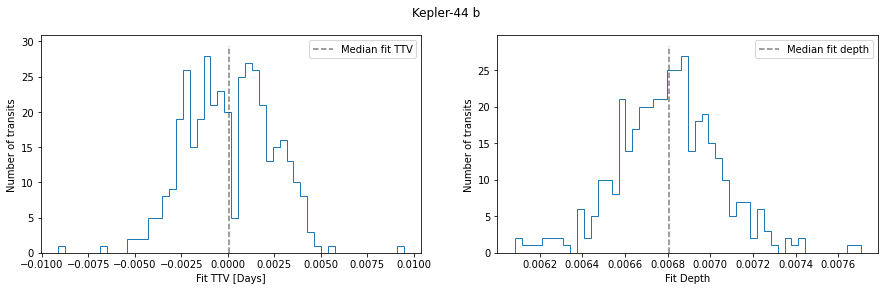

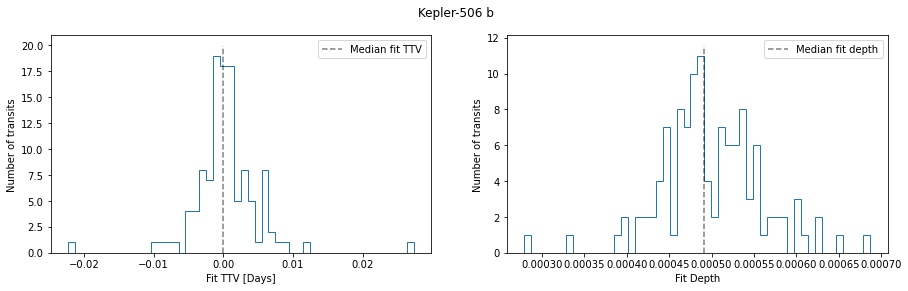

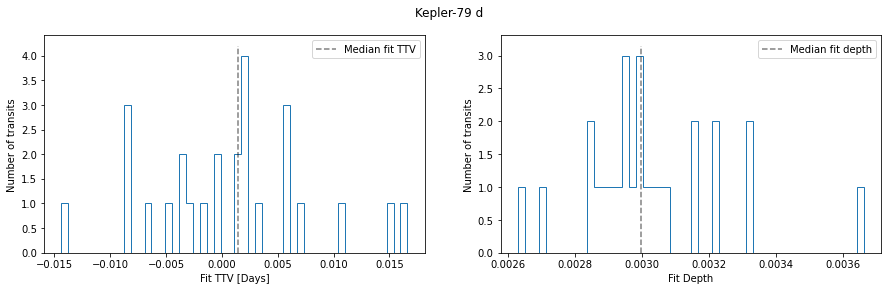

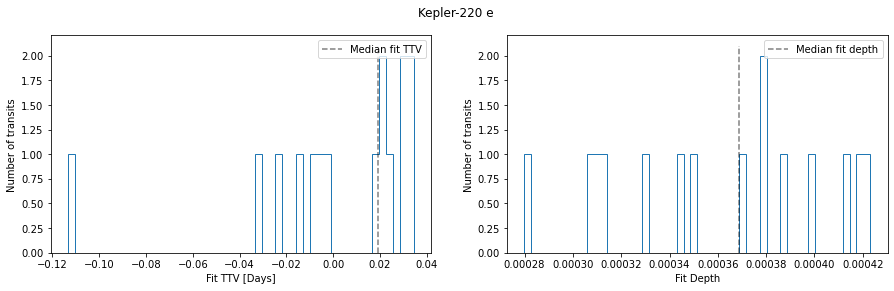

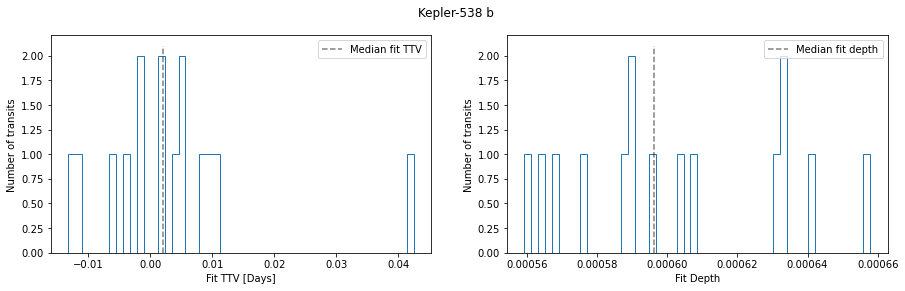

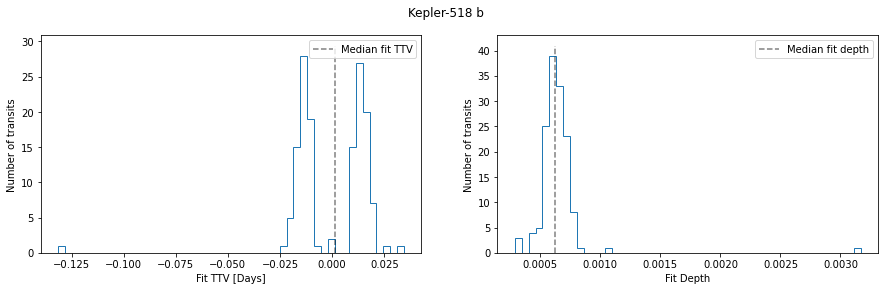

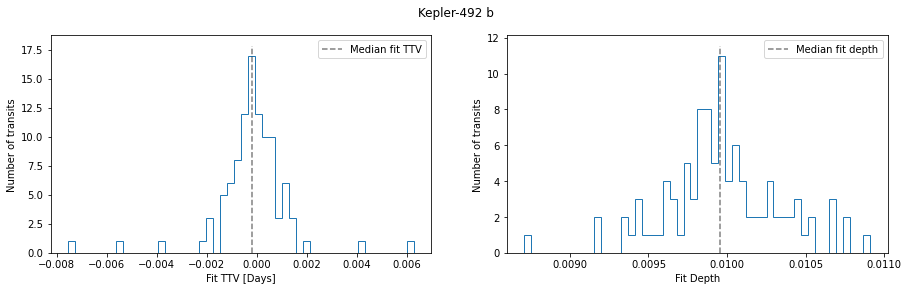

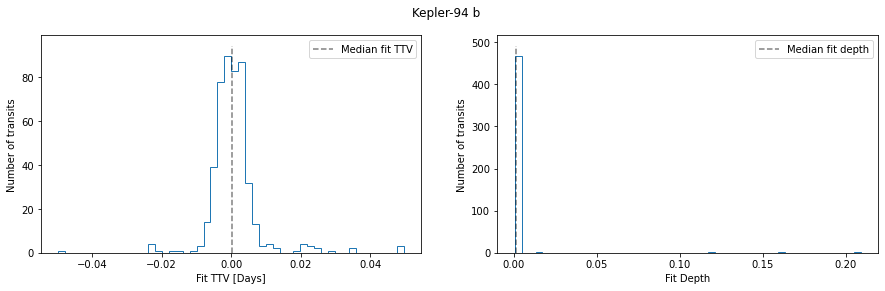

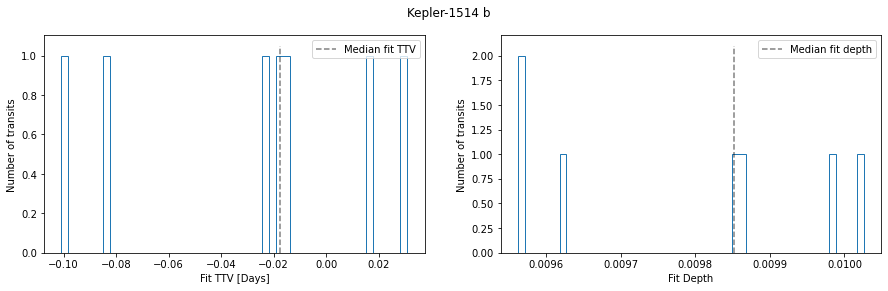

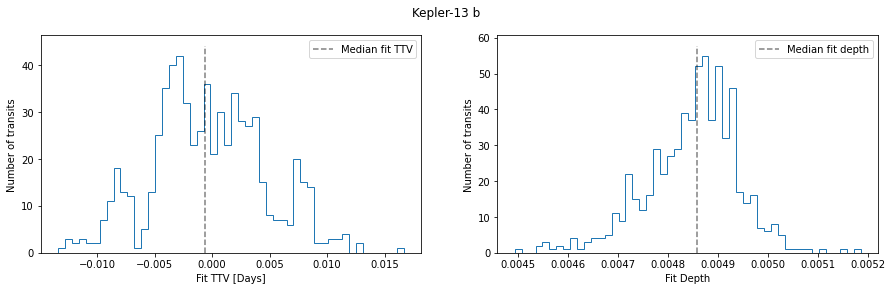

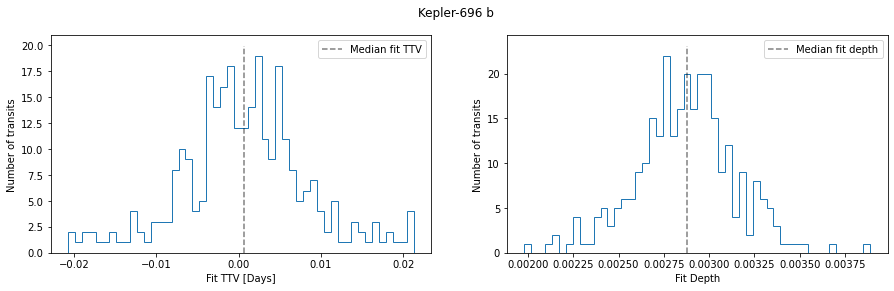

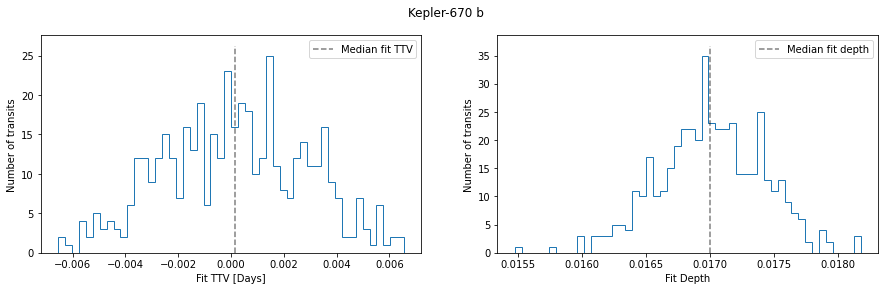

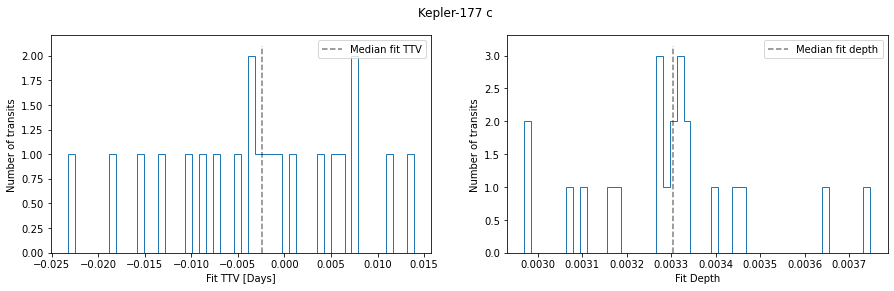

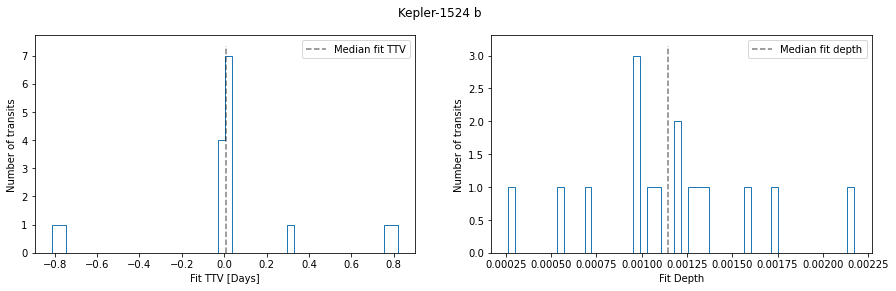

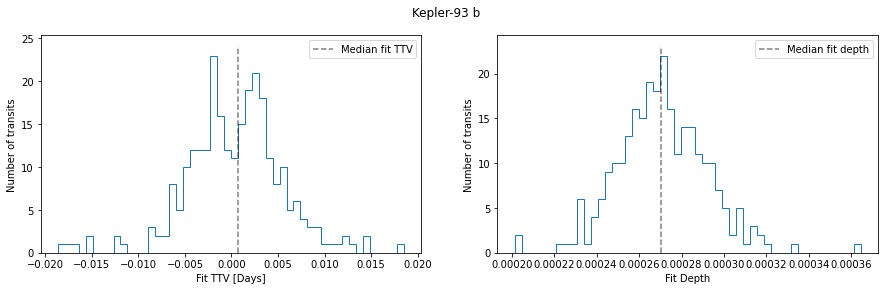

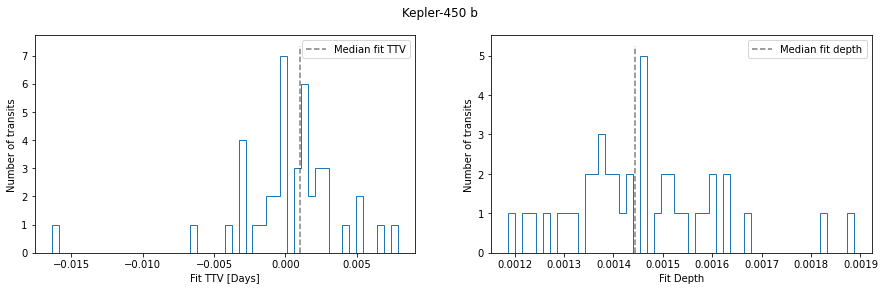

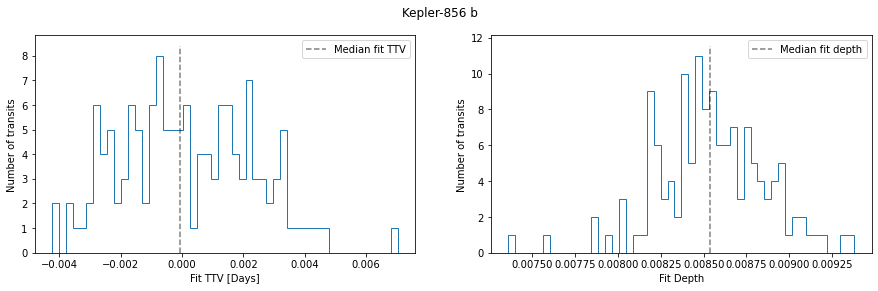

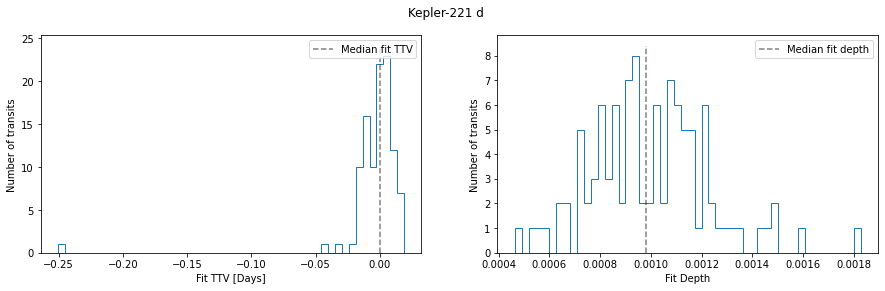

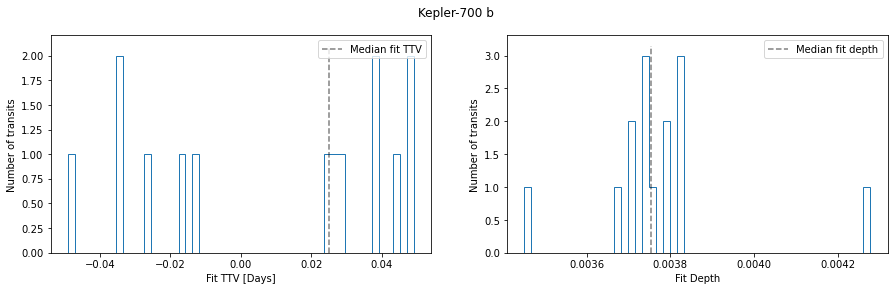

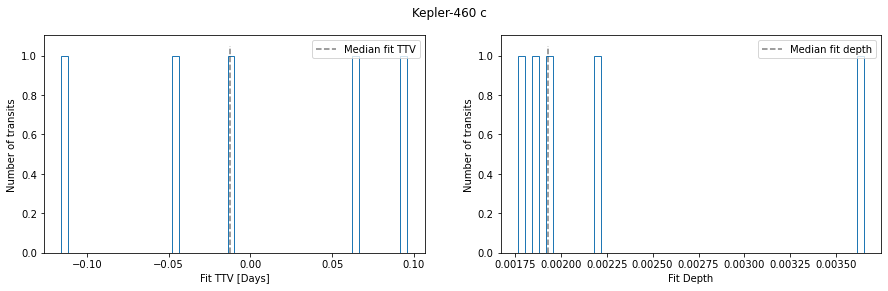

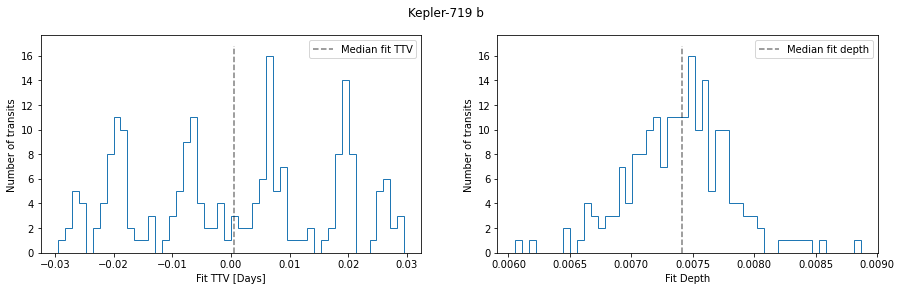

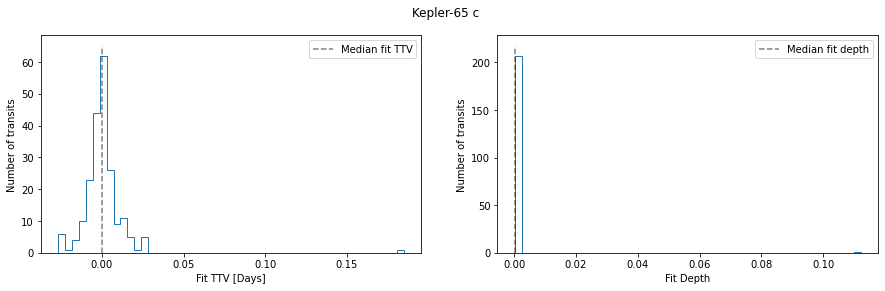

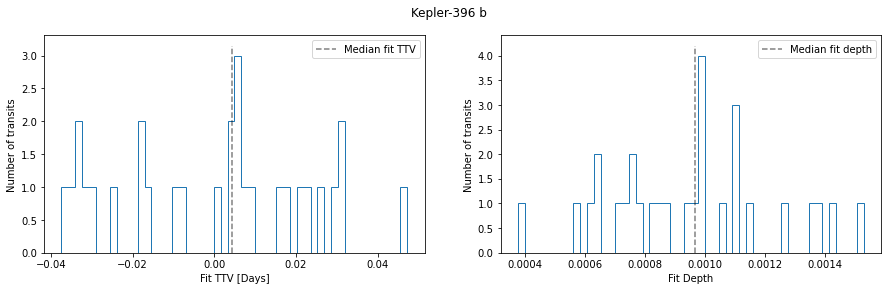

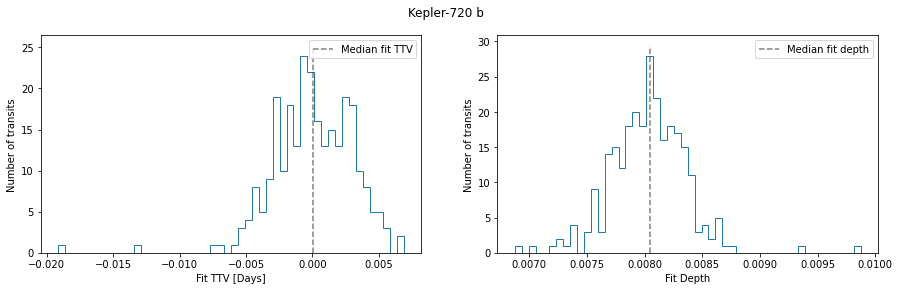

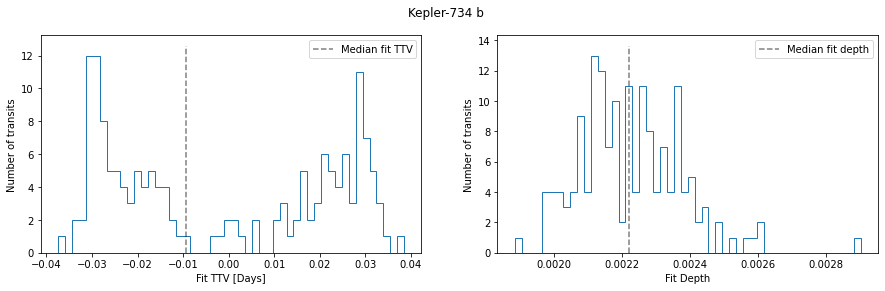

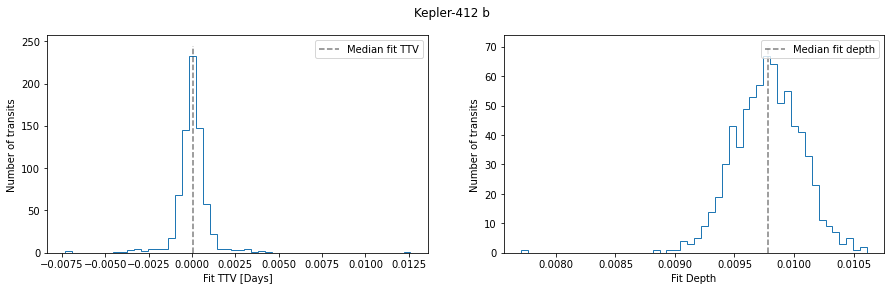

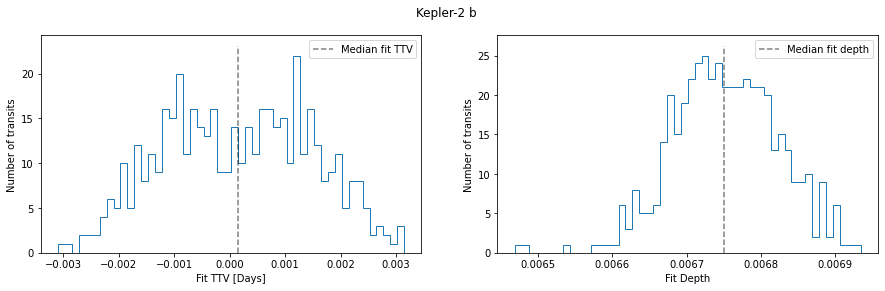

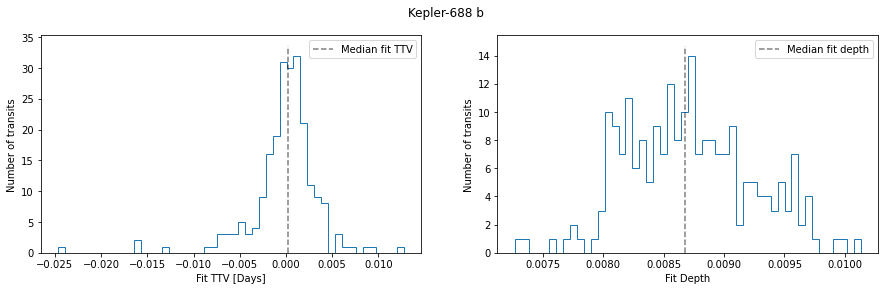

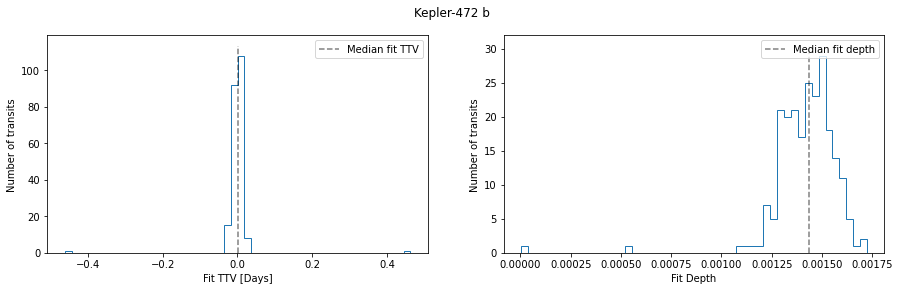

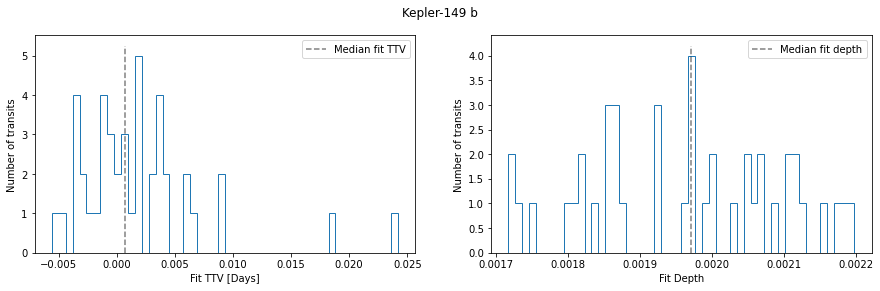

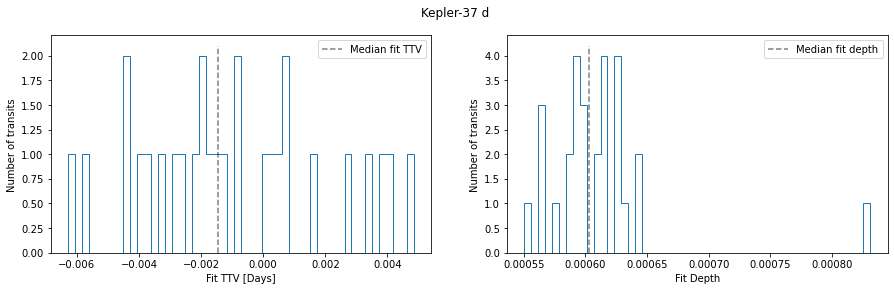

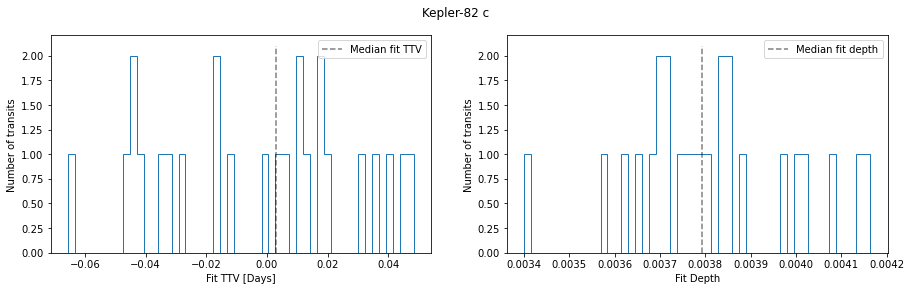

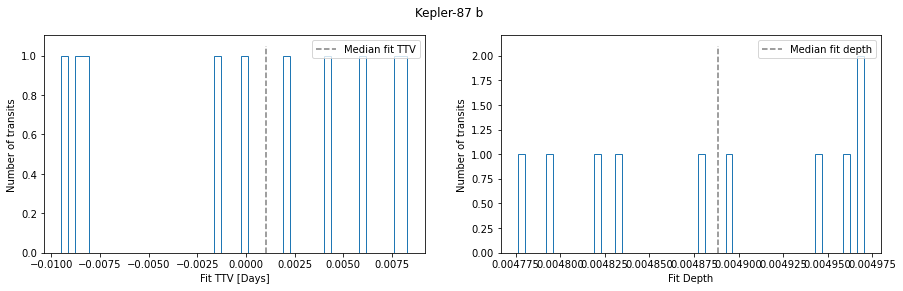

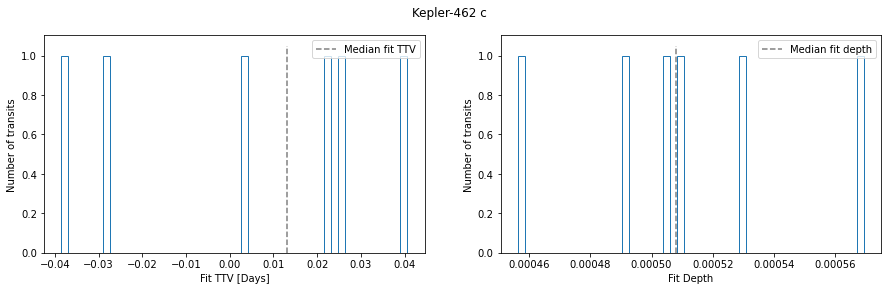

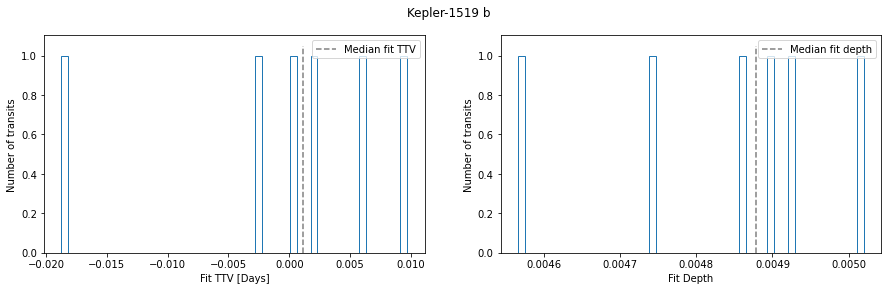

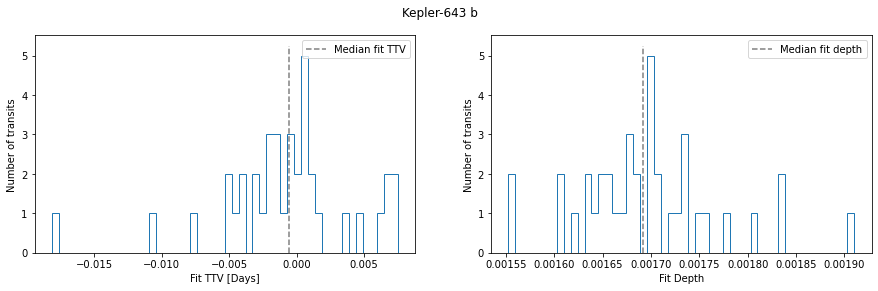

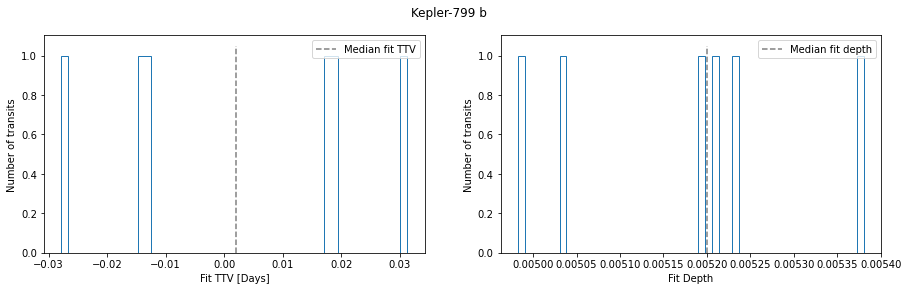

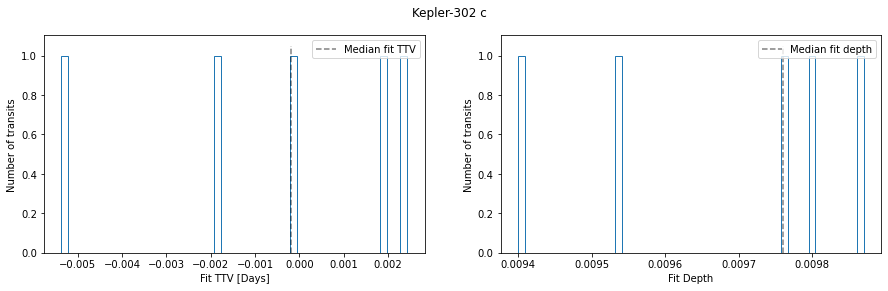

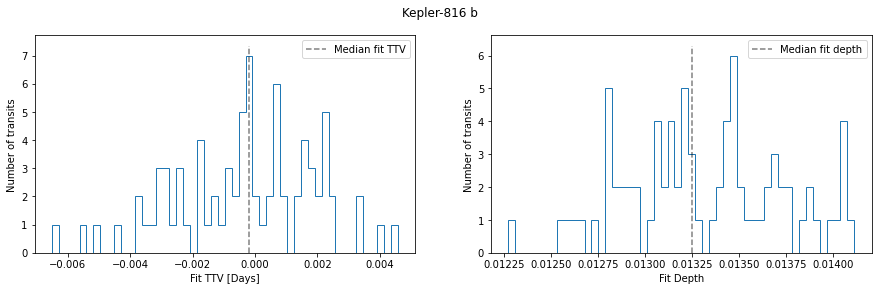

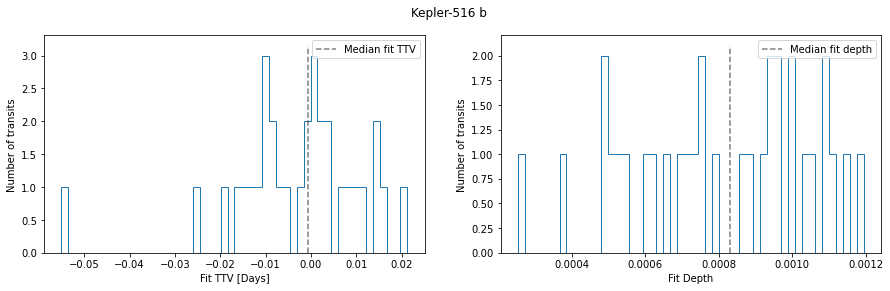

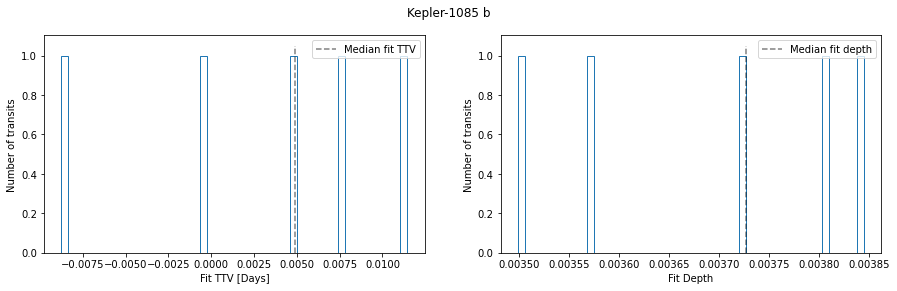

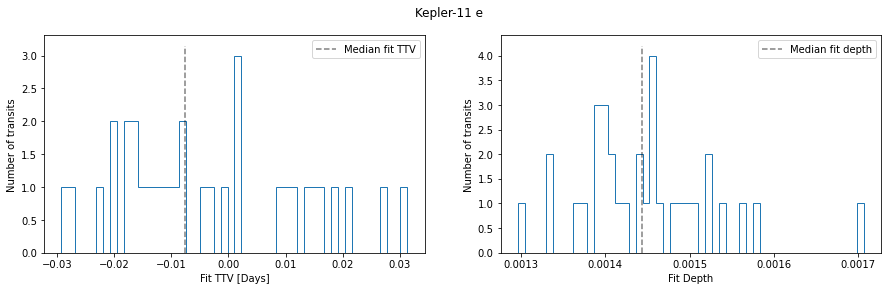

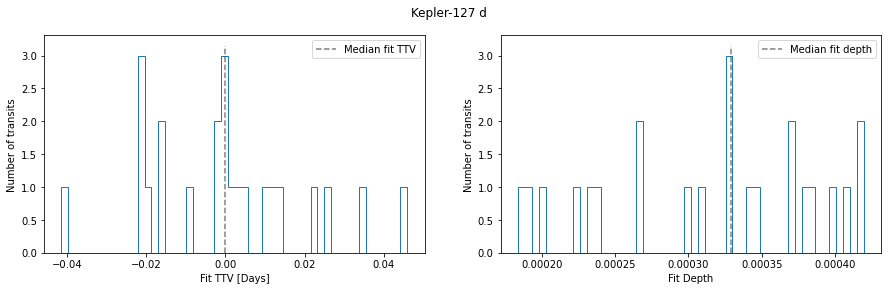

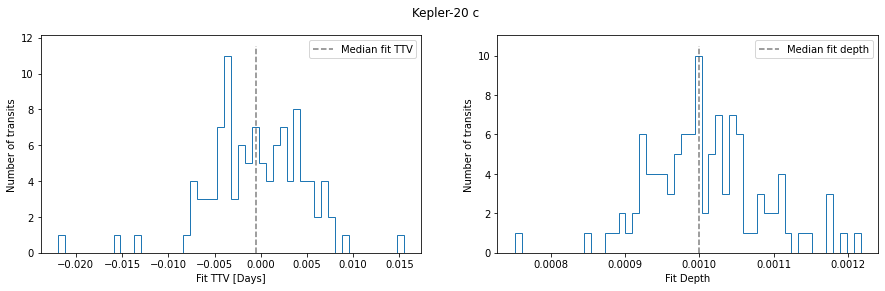

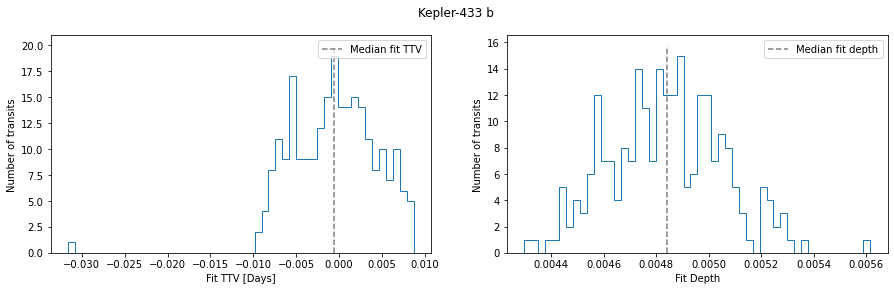

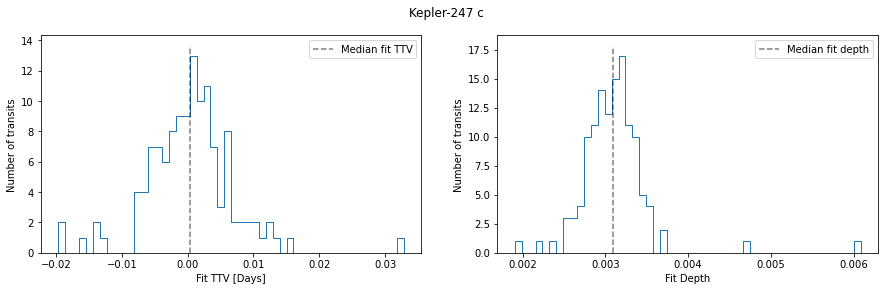

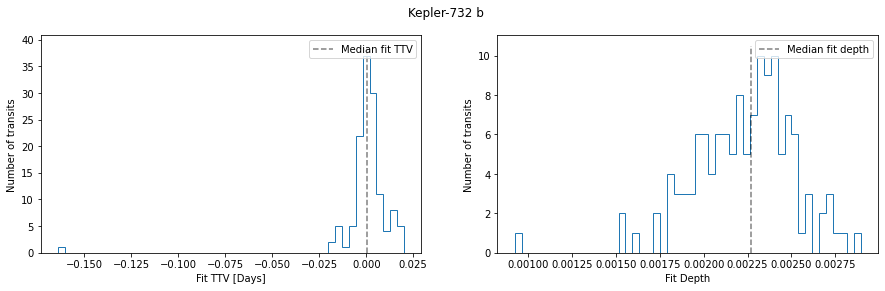

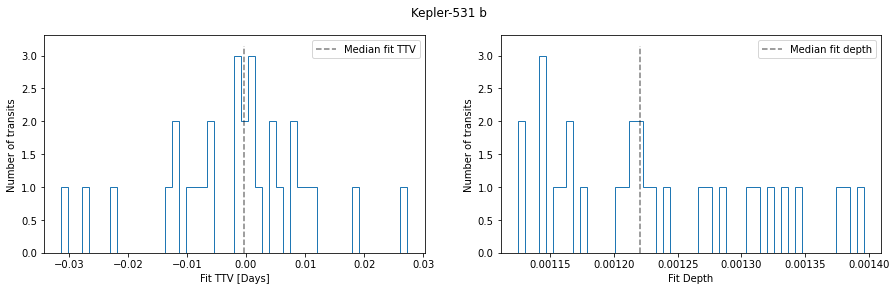

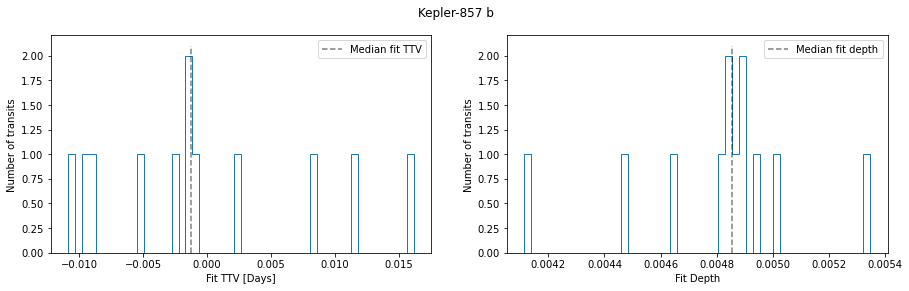

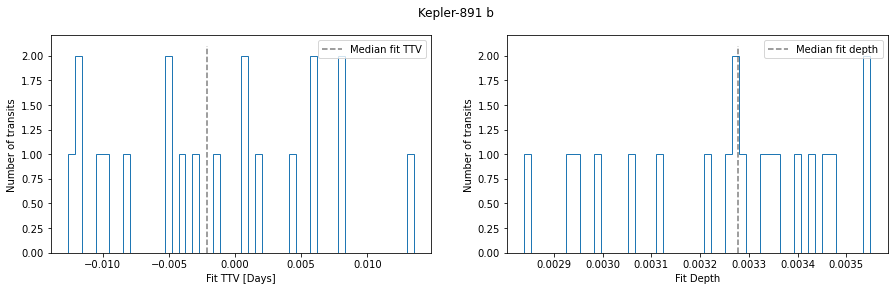

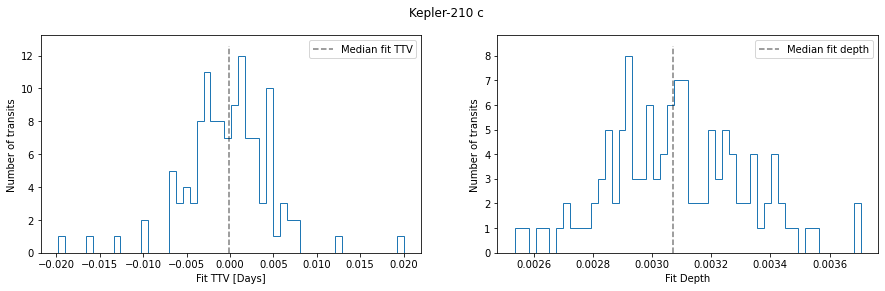

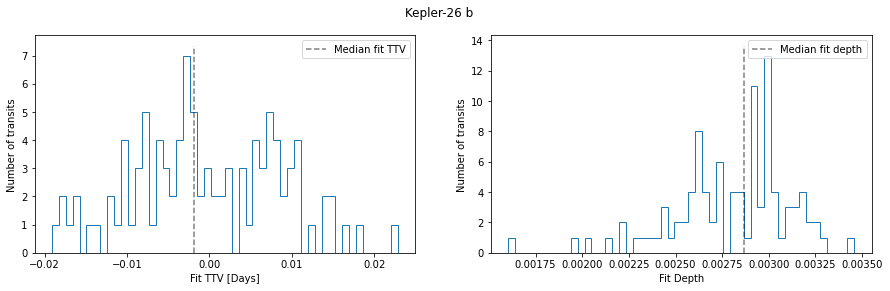

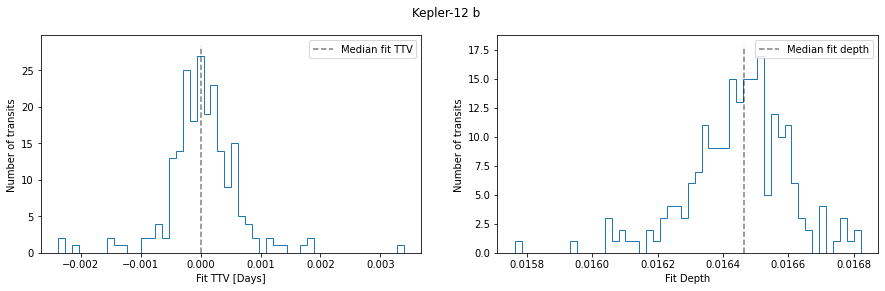

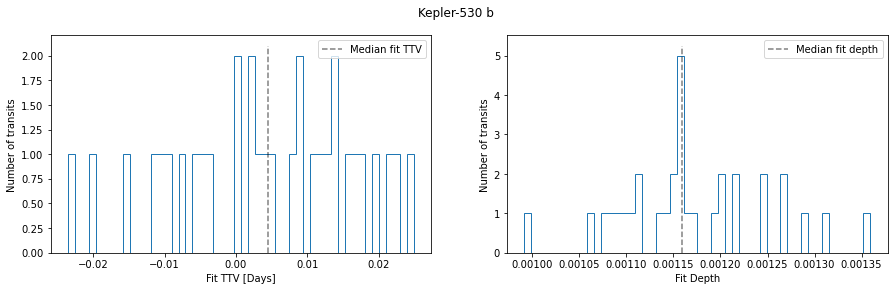

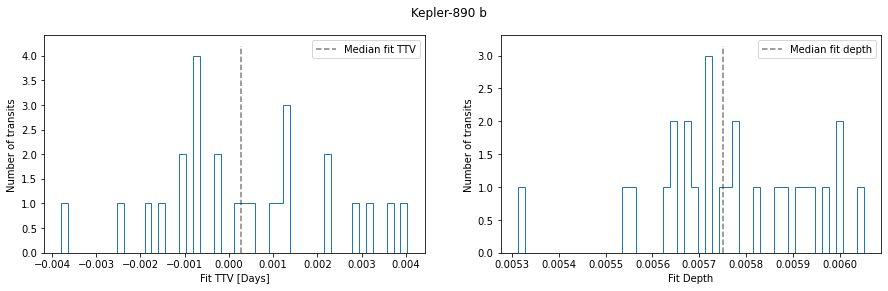

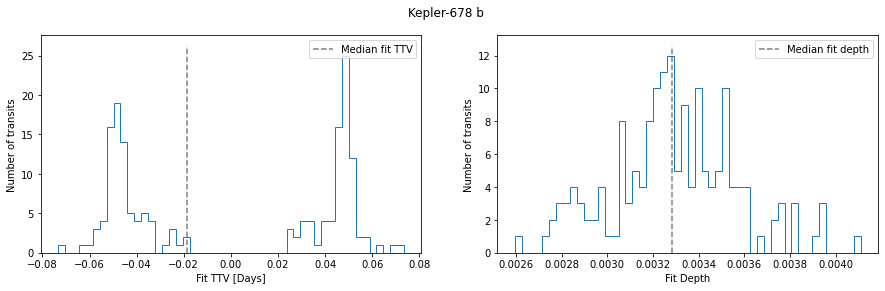

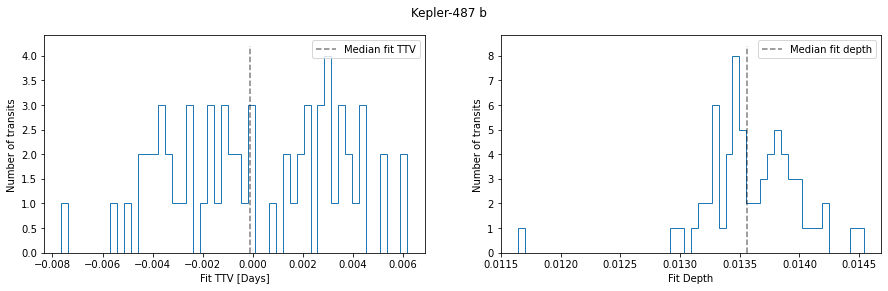

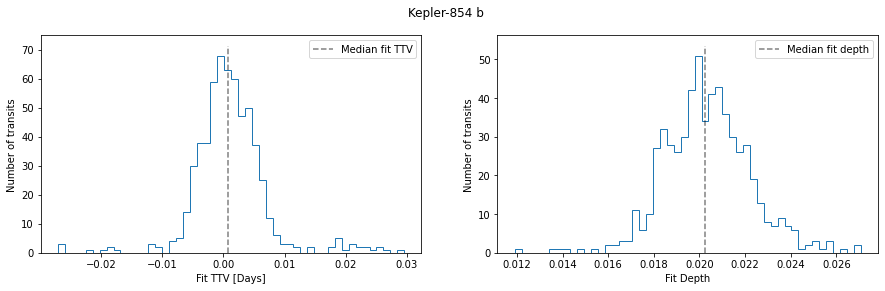

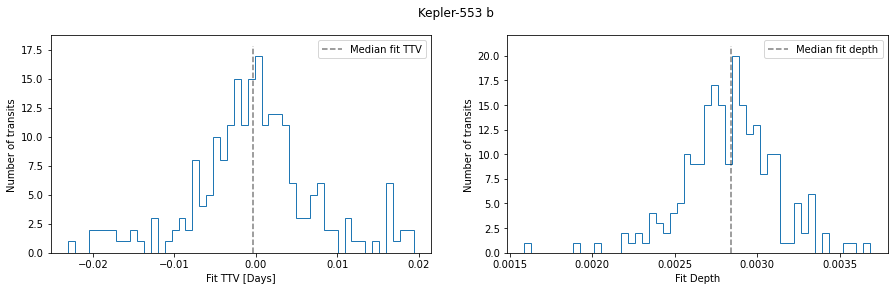

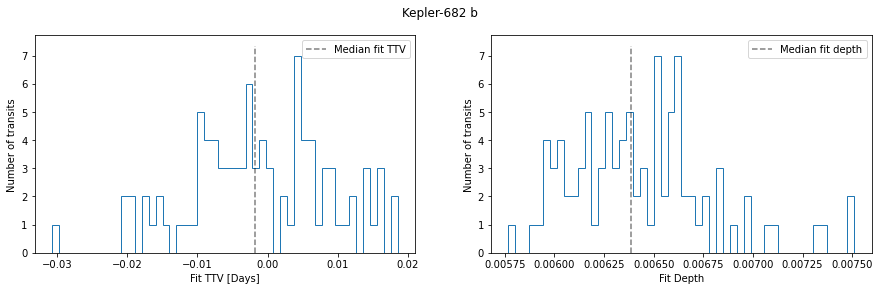

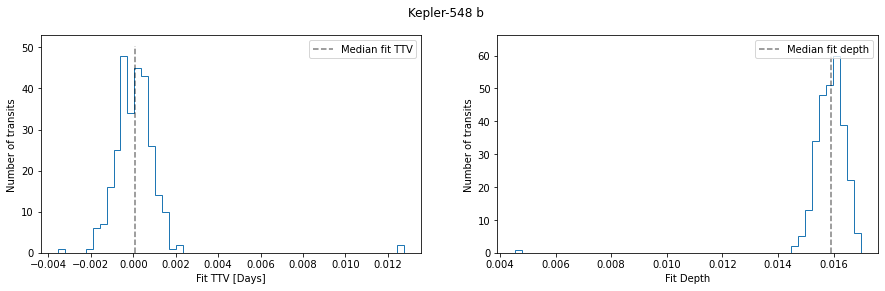

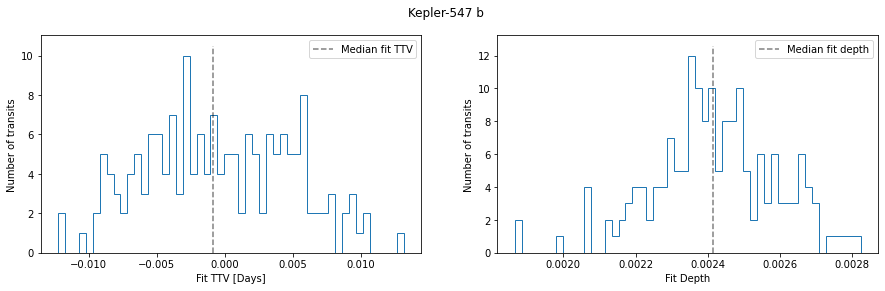

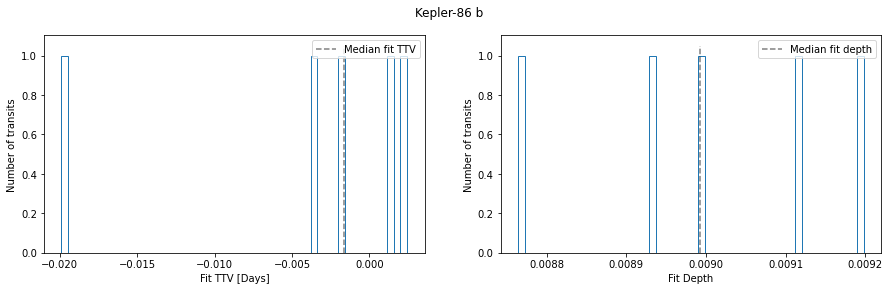

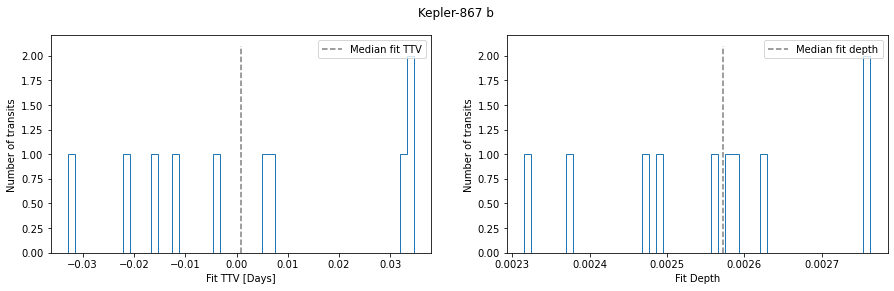

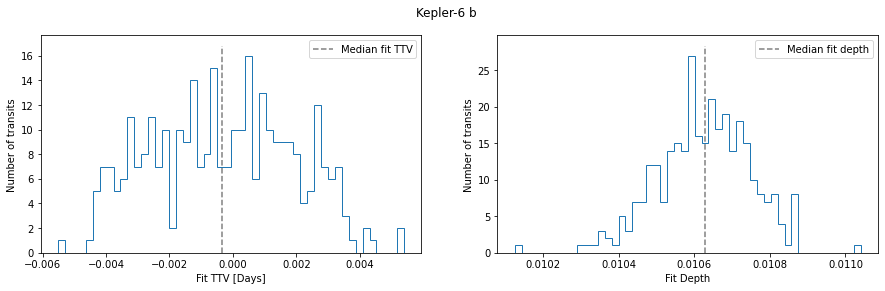

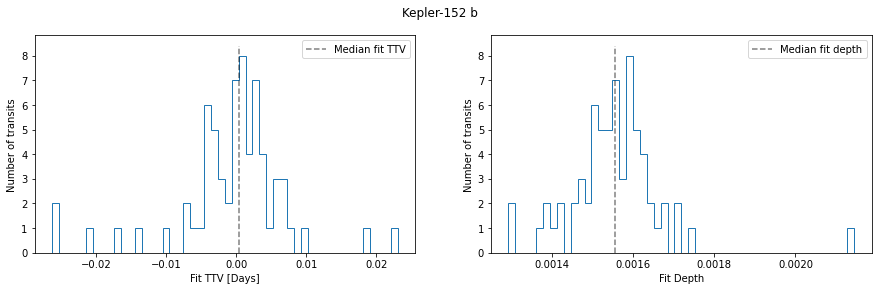

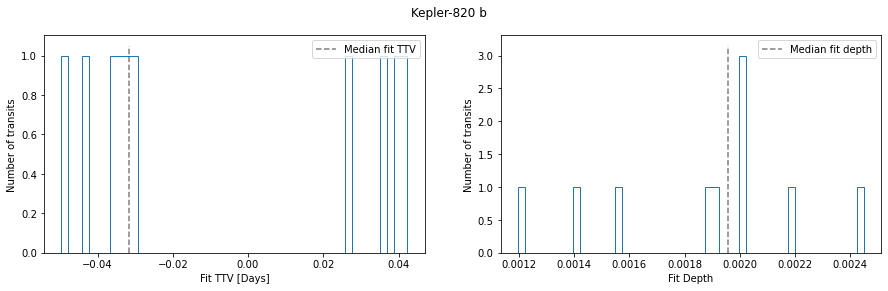

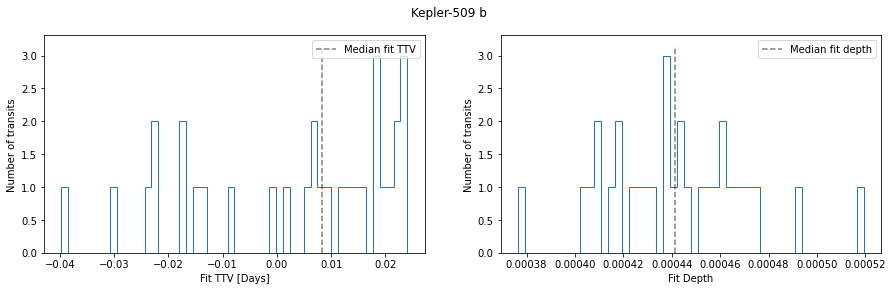

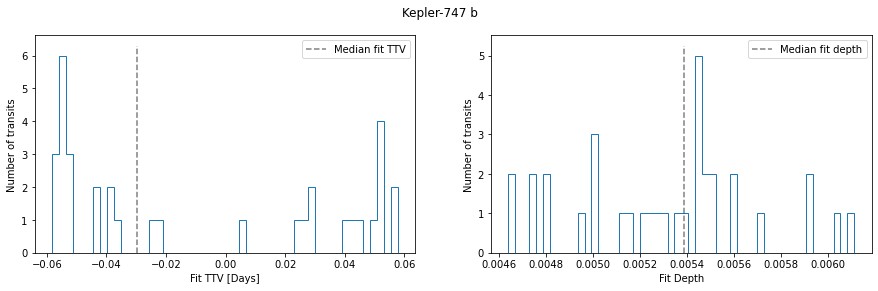

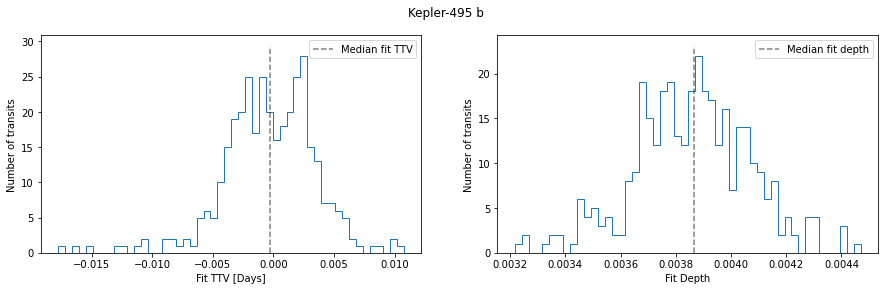

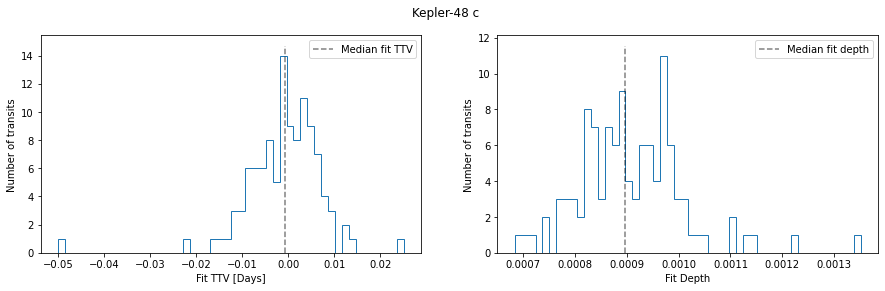

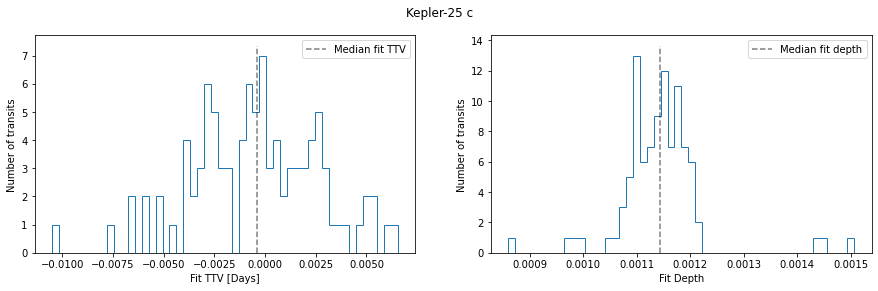

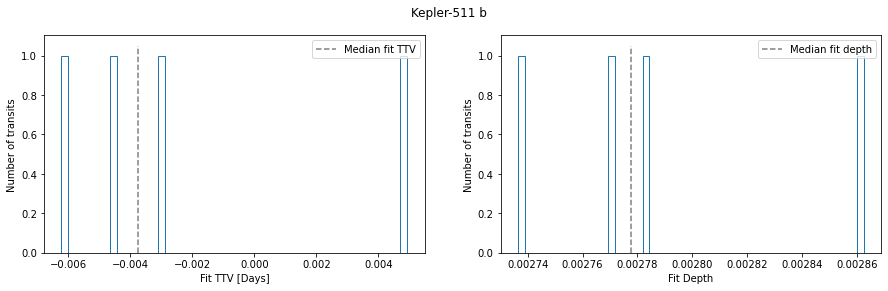

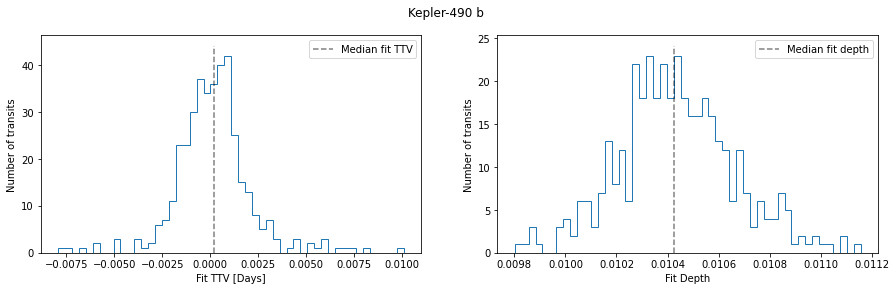

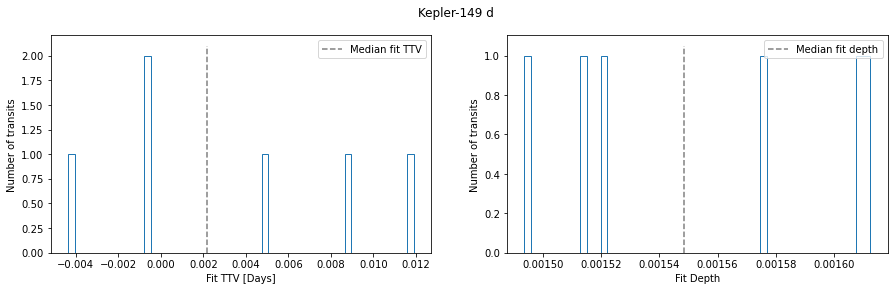

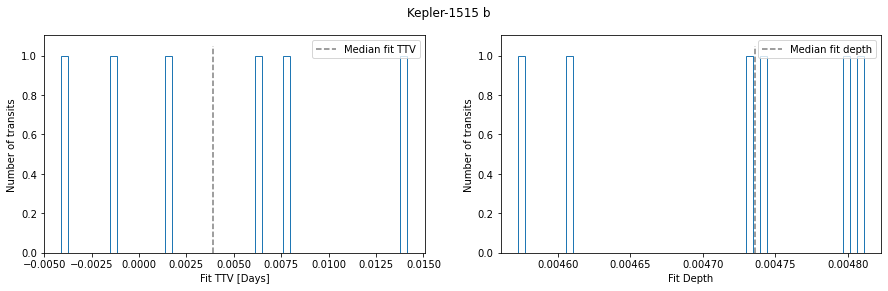

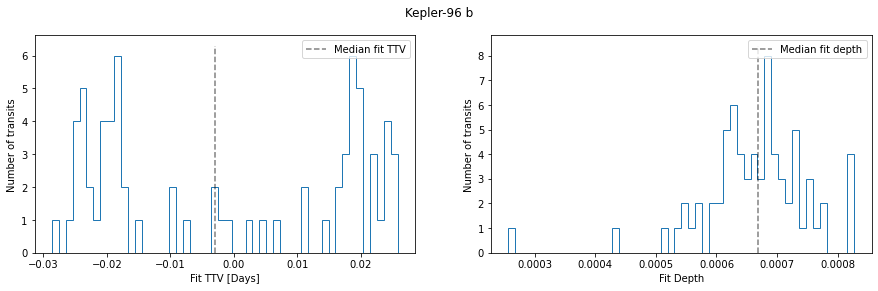

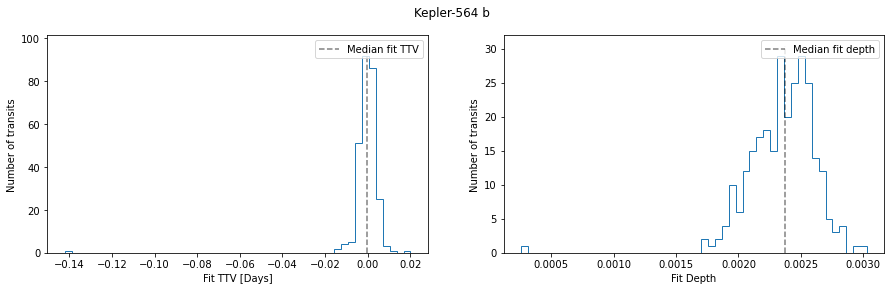

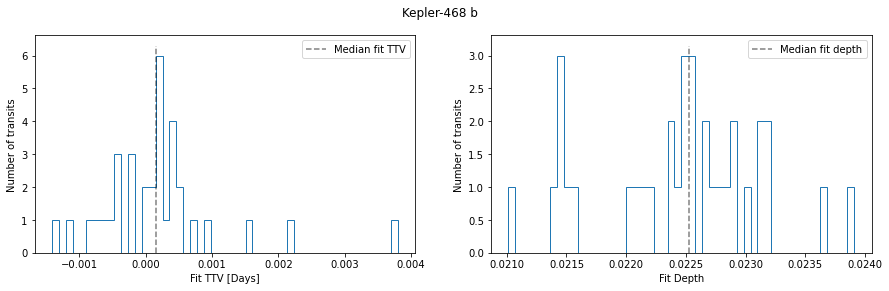

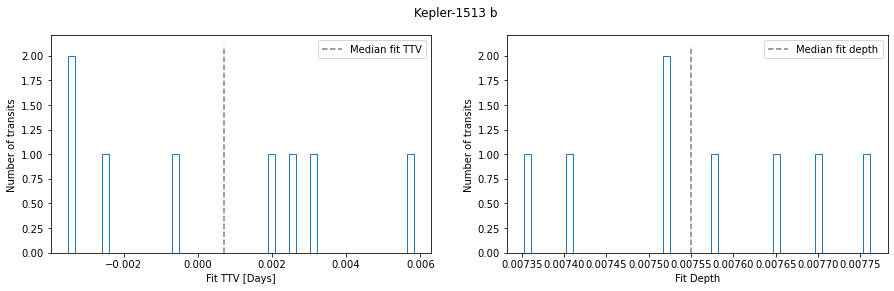

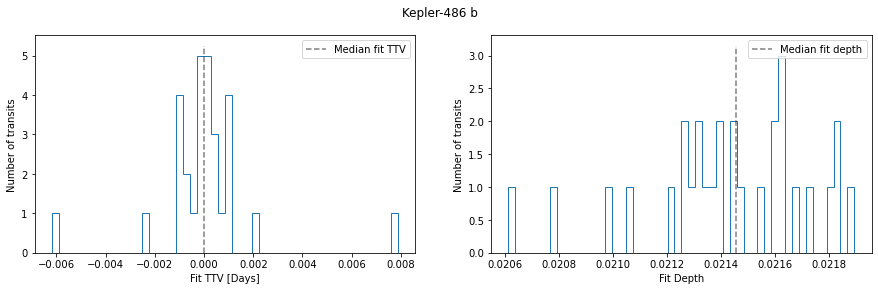

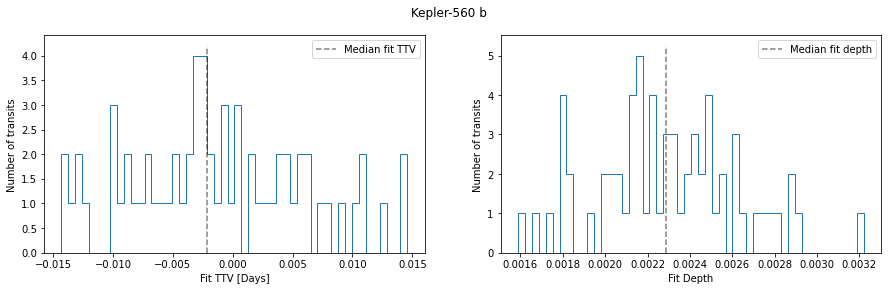

In [75]:
# is this fue to significant non-guassion distribution?
for i in range(len(dir_list[0:100])): 
    #print(planet)
    planet_dir = dir_list[i]
    planet = planet_dir
    if os.path.isfile(directory + '/' + planet_dir + '/Log.txt'):
        #print('Batman_outputs_236/' + planet_dir + '/Log.txt')
        failed_arr += [planet]
        failed_star_arr += [planet.split(' ')[0]]
        file = open(directory + '/' + planet_dir + '/Log.txt')
        error = file.read()
        print(planet + ': ' + error)
        if 'depth' in error:
            too_shallow_arr += [planet]
        #print(error)
        continue
    results = pd.read_csv(directory + '/' + planet_dir + '/Fit_data_' + planet + '.csv', skipfooter = 12, engine='python')
    fit_depth = np.array(results['Fit_depths'])
    fit_time = np.array(results['Fit_transit_times'])  
    expected_params = pd.read_csv(directory + '/' + planet_dir + '/Fit_data_' + planet + '.csv', skiprows = len(results) + 3, skipfooter = 8, engine='python')
    expected_period = list(expected_params['period'])[0]
    expected_t0 = list(expected_params['t0'])[0]
    num_transits = len(fit_time)
    expected_midpoints = np.linspace(expected_t0, expected_t0 + (num_transits - 1) * expected_period, num_transits)#.reshape(1,num_transits)
    fit_ttv = fit_time - expected_midpoints
    plot_hists = True
    skip_mask = (fit_time != -1) * (fit_time != -2)
    med_depth = np.nanmedian(fit_depth[skip_mask])
    med_ttv = np.nanmedian(fit_ttv[skip_mask])
    if plot_hists:
        plt.figure(figsize = [15,4])
        plt.subplot(121)
        bins = 50
        plt.hist(fit_ttv[skip_mask], histtype = 'step', bins = bins, align = 'mid')
        [ylims, xlims] = [plt.gca().get_ylim(), plt.gca().get_xlim()]
        plt.vlines(med_ttv, ymin = ylims[0], ymax = ylims[1], alpha = 0.5, ls = 'dashed', label = 'Median fit TTV')
        plt.xlabel('Fit TTV [Days]')
        plt.ylabel('Number of transits')
        plt.legend()
        plt.subplot(122)
        bins = 50
        plt.hist(fit_depth[skip_mask], histtype = 'step', bins = bins, align = 'mid')
        [ylims, xlims] = [plt.gca().get_ylim(), plt.gca().get_xlim()]
        plt.vlines(med_depth, ymin = ylims[0], ymax = ylims[1], alpha = 0.5, ls = 'dashed', label = 'Median fit depth')
        plt.xlabel('Fit Depth')
        plt.ylabel('Number of transits')
        plt.legend()
        plt.suptitle(planet)

In [4]:
flagged_planets_unique = list(set(planets_flagged))
#df = pd.DataFrame(flagged_planets_unique, columns = ['Name'])
#df.to_csv('Unique_flagged_planets.csv', index = False)
textfile = open("flagged_planets_unique.txt", "w")
for i in range(len(flagged_planets_unique)):
    element = flagged_planets_unique[i]
    if i < len(flagged_planets_unique) - 1:
        textfile.write(element + ", ")
    elif i == len(flagged_planets_unique) - 1:
        textfile.write(element)
textfile.close()


10 planets failed to run, of 228 total planets.
10 stars had at least one failed planet, of 217 total stars.
0 planets had all transits skipped due to missing data.

Of 39468 total transits over all planets: 
     51 flagged for TTVs
     6 flagged as missing
     92 flagged for depth
     5 flagged for depth and ttv
     3 flagged as missing and ttv

Number of systems with at least one flag: 84
          with at least one missing flag: 5
            with at least one depth flag: 67
              with at least one ttv flag: 33
                         with both flags: 16

Planets with highest fraction of transits flagged for TTV: 
     Kepler-1655 b: 1.0 flagged of 119.0 total.
     Kepler-492 b: 1.0 flagged of 124.0 total.
     Kepler-221 d: 1.0 flagged of 145.0 total.
     Kepler-122 c: 1.0 flagged of 117.0 total.
     Kepler-18 c: 5.0 flagged of 191.0 total.
Planets with highest fraction of transits flagged as missing: 
     Kepler-1655 b: 2.0 flagged of 119.0 total.
     Kepler-47

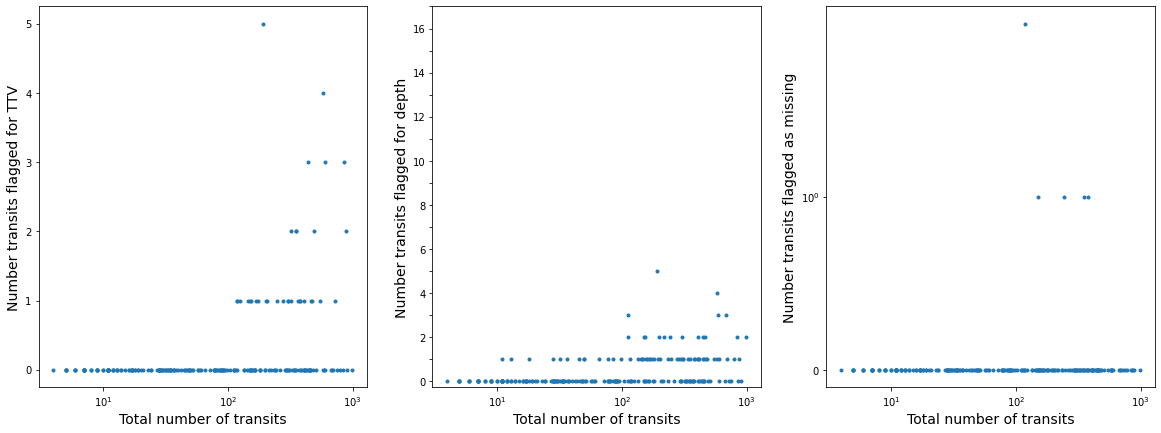

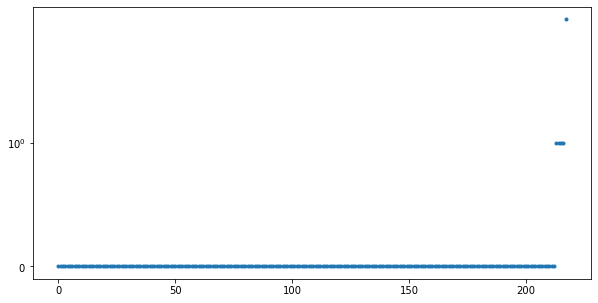

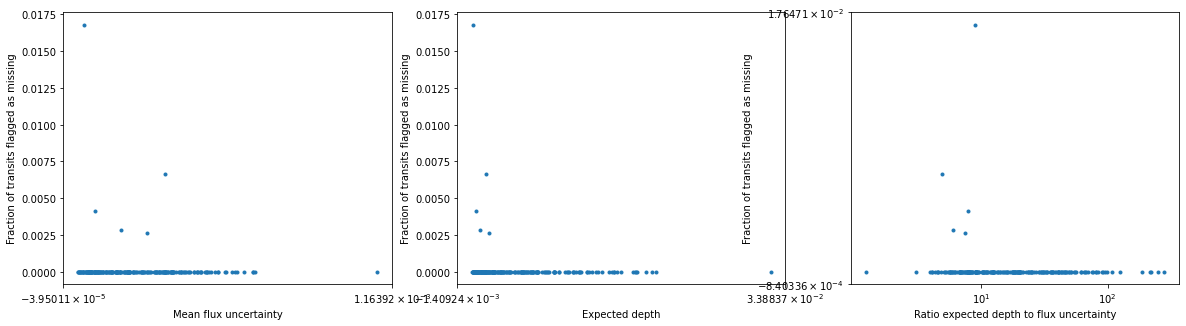

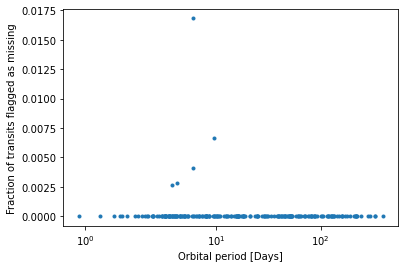

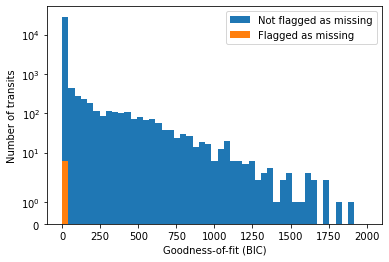

In [25]:
fs = 14
plt.figure(figsize = [20,7])
plt.subplot(131)
plt.plot(num_transits, frac_flagged_ttv * num_transits, '.', label = 'Exoplanet system')
#plt.plot(num_transits, num_ttv_flag , '.', label = 'Exoplanet system')
plt.xlabel('Total number of transits', fontsize = fs)
plt.ylabel('Number transits flagged for TTV', fontsize = fs)
plt.xscale('symlog')
#plt.yticks([0,1,2,3,4,5,6,7,8,9,10], ['0', '1', '', '', '', '', '', '', '', '','10'])
plt.subplot(132)
plt.plot(num_transits, frac_flagged_depth * num_transits, '.', label = 'Exoplanet system')
plt.xlabel('Total number of transits', fontsize = fs)
plt.ylabel('Number transits flagged for depth', fontsize = fs)
plt.xscale('symlog')
plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17], ['0', '', '2', '', '4', '', '6', '', '8', '','10', '', '12', '', '14', '', '16'])
plt.subplot(133)
plt.plot(num_transits, frac_flagged_flat * num_transits, '.', label = 'Exoplanet system')
plt.xlabel('Total number of transits', fontsize = fs)
plt.ylabel('Number transits flagged as missing', fontsize = fs)
plt.xscale('symlog')
plt.yscale('symlog')
#plt.yticks([0,1,2,3,4,5,6,7,8,9,10], ['0', '1', '', '', '', '', '', '', '', '','10'])

# overall diagnostics
print()
print(str(len(failed_arr)) + ' planets failed to run, of ' + str(len(dir_list)) + ' total planets.')
print(str(len(list(set(failed_star_arr)))) + ' stars had at least one failed planet, of ' + str(len(unique_stars)) + ' total stars.')
print(str(len(np.where(frac_skipped_arr == 1)[0])) + ' planets had all transits skipped due to missing data.')

print()
print('Of ' + str(int(np.nansum(num_transits))) + ' total transits over all planets: ')
print('     ' + str(int(np.nansum(num_ttv_flag))) + ' flagged for TTVs')
print('     ' + str(int(np.nansum(num_flat_flag))) + ' flagged as missing')
print('     ' + str(int(np.nansum(num_depth_flag))) + ' flagged for depth')
print('     ' + str(int(np.nansum(num_depth_and_ttv_flag))) + ' flagged for depth and ttv')
print('     ' + str(int(np.nansum(num_flat_and_ttv_flag))) + ' flagged as missing and ttv')

print()
print('Number of systems with at least one flag: ' + str(len(np.where(has_flag)[0])))
print('          with at least one missing flag: ' + str(len(np.where(has_flat_flag)[0])))
print('            with at least one depth flag: ' + str(len(np.where(has_depth_flag)[0])))
print('              with at least one ttv flag: ' + str(len(np.where(has_ttv_flag)[0])))
print('                         with both flags: ' + str(len(np.where(has_ttv_flag * has_depth_flag)[0])))
print()

#Flag diagnostics
n = 5
# TTV flag
five_highest = np.where(frac_flagged_ttv > np.sort(frac_flagged_ttv[np.invert(np.isnan(frac_flagged_ttv))])[-n - 1])
names = [dir_list[i] for i in five_highest[0]]
print('Planets with highest fraction of transits flagged for TTV: ')
for i in range(n):
    num_flagged = num_ttv_flag[dir_list.index(names[i])]
    num_total = num_transits[dir_list.index(names[i])]
    print('     ' + str(names[i]) + ': ' + str(num_flagged) + ' flagged of ' + str(num_total) + ' total.')
    
#  Missing flag
five_highest = np.where(frac_flagged_flat > np.sort(frac_flagged_flat[np.invert(np.isnan(frac_flagged_flat))])[-n - 1])
names = [dir_list[i] for i in five_highest[0]]
print('Planets with highest fraction of transits flagged as missing: ')
for i in range(n):
    num_flagged = num_flat_flag[dir_list.index(names[i])]
    num_total = num_transits[dir_list.index(names[i])]
    print('     ' + str(names[i]) + ': ' + str(num_flagged) + ' flagged of ' + str(num_total) + ' total.')
    
#  Depth flag
five_highest = np.where(frac_flagged_depth >= np.sort(frac_flagged_depth[np.invert(np.isnan(frac_flagged_depth))])[-n - 1])[0]
names = [dir_list[i] for i in five_highest]
print('Planets with highest fraction of transits flagged for depth: ')
for i in range(n):
    num_flagged = num_depth_flag[dir_list.index(names[i])]
    num_total = num_transits[dir_list.index(names[i])]
    print('     ' + str(names[i]) + ': ' + str(num_flagged) + ' flagged of ' + str(num_total) + ' total.')
#print('     ' + str([dir_list[i] for i in five_highest[0]]))
print()

# histogram number of missing transits per star -- what is true of these stars?
#print('Missing transits:')
has_missing = np.where(num_flat_flag > 0)[0]
names = [dir_list[i] for i in has_missing]
#print('Planets with highest number of transits flagged as missing: ')
#for i in range(len(names)):
#    num_flagged = num_flat_flag[dir_list.index(names[i])]
#    num_total = num_transits[dir_list.index(names[i])]
#    print('     ' + str(names[i]) + ': ' + str(num_flagged) + ' flagged of ' + str(num_total) + ' total.')
#print()
plt.figure(figsize = [10,5])
plt.plot(np.sort(num_flat_flag), '.')
plt.yscale('symlog')
plt.figure(figsize = [20,5])
plt.subplot(131)
plt.plot(mean_flux_err, frac_flagged_flat, '.')
plt.xlabel('Mean flux uncertainty')
plt.ylabel('Fraction of transits flagged as missing')
plt.xscale('symlog')
plt.subplot(132)
plt.plot(expected_depth, frac_flagged_flat, '.')
plt.xlabel('Expected depth')
plt.ylabel('Fraction of transits flagged as missing')
plt.xscale('symlog')
plt.subplot(133)
plt.plot(depth_err_ratio, frac_flagged_flat, '.')
plt.xlabel('Ratio expected depth to flux uncertainty')
plt.ylabel('Fraction of transits flagged as missing')
plt.yscale('symlog')
plt.xscale('symlog')

plt.figure()
plt.plot(periods, frac_flagged_flat, '.')
plt.xlabel('Orbital period [Days]')
plt.ylabel('Fraction of transits flagged as missing')
plt.xscale('symlog')

plt.figure()
plt.hist(all_BIC[all_flat_flags == 0], label = 'Not flagged as missing', bins = np.linspace(0,2000))
plt.hist(all_BIC[all_flat_flags == 1], label = 'Flagged as missing', bins = np.linspace(0,2000))
plt.yscale('symlog')
plt.xlabel('Goodness-of-fit (BIC)')
plt.ylabel('Number of transits')
plt.legend()

In [6]:
# which failed? Will have to fix their names by hand
#sorted(failed_arr)
#textfile = open("planet_list_236_redos.txt", "w")
#for i in range(len(failed_arr)):
#    element = failed_arr[i]
#    if i < len(failed_arr) - 1:
#        textfile.write(element + ", ")
#    elif i == len(failed_arr) - 1:
#        textfile.write(element)
#textfile.close()


In [12]:
failed_arr

['Kepler-1698 b',
 'Kepler-1642 b',
 'Kepler-1624 b',
 'Kepler-951 b',
 'Kepler-1490 b',
 'Kepler-1529 b',
 'Kepler-1628 b',
 'Kepler-1446 b',
 'Kepler-297 c']

In [ ]:
# look at the ones with missing transit(s)

import lightkurve as lk
for i in np.where(num_flat_flag > 0)[0]:
    planet_name = dir_list[i] 
    if planet_name.startswith('kepler-') or planet_name.startswith('Kepler-'):
        planet_name = planet_name.replace('k','K')
        print('|planet_name| : |' + planet_name + '|')
        star_name = planet_name[:-1].replace(' ', '')
        print('|star_name| : |' + star_name + '|')  
        obs_type = planet_name.split('-')[0]
    
    search_result = lk.search_lightcurve(star_name, author=obs_type, cadence='long')
    lc_collection = search_result.download_all()
    lc = lc_collection.stitch().remove_outliers()
    flux = lc.flux.value           # Flux [relative units]
    time = lc.time.value           # Time  [BKJD days]
    flux_err = lc.flux_err.value   # Uncertainty in flux
    quality = lc.quality           # Quality flags
    #quality = quality[np.invert(mask)]

    # assesss quality flags and remove bad data
    good_data_flag = (quality == 0) * (flux_err > 0) * (np.isfinite(time)) * (np.isfinite(flux)) * (np.isfinite(flux_err)) 
    bad_time = time[np.invert(good_data_flag)]
    bad_flux = flux[np.invert(good_data_flag)]
    time = time[good_data_flag]
    flux = flux[good_data_flag]
    flux_err = flux_err[good_data_flag]
    
    plt.figure(figsize = [15,5])
    plt.plot(time, flux, '.', label = 'Flux', markersize = 4)
    #plt.plot(bad_time, bad_flux, '.', label = 'Quality flagged', markersize = 4)
    #plt.plot(no_mask_time[mask], no_mask_flux[mask], '.', label = 'Masked flux', markersize = 4)
    plt.errorbar(time, flux, yerr = flux_err, color = 'gray', alpha = 0.5, ls = 'None', label = 'Flux error')
    #plt.vlines(expected_midpoints, ymin = np.nanmin(flux), ymax = np.nanmax(flux), linewidth = 1.5, color = 'gray', label = 'Expected transits')
    plt.margins(x=0.01)
    plt.ylabel('Normalized relative flux', fontsize = 16)
    plt.xlabel('Time [BKJD Days]', fontsize = 16)
    plt.legend(fontsize = 16)
    plt.title(planet_name)

In [ ]:
# look at the ones with all transits skipped

import lightkurve as lk
for i in np.where(frac_skipped_arr == 1)[0]:
    planet_name = dir_list[i] 
    if planet_name.startswith('kepler-') or planet_name.startswith('Kepler-'):
        planet_name = planet_name.replace('k','K')
        print('|planet_name| : |' + planet_name + '|')
        star_name = planet_name[:-1].replace(' ', '')
        print('|star_name| : |' + star_name + '|')  
        obs_type = planet_name.split('-')[0]
    
    search_result = lk.search_lightcurve(star_name, author=obs_type, cadence='long')
    lc_collection = search_result.download_all()
    lc = lc_collection.stitch().remove_outliers()
    flux = lc.flux.value           # Flux [relative units]
    time = lc.time.value           # Time  [BKJD days]
    flux_err = lc.flux_err.value   # Uncertainty in flux
    quality = lc.quality           # Quality flags
    #quality = quality[np.invert(mask)]

    # assesss quality flags and remove bad data
    good_data_flag = (quality == 0) * (flux_err > 0) * (np.isfinite(time)) * (np.isfinite(flux)) * (np.isfinite(flux_err)) 
    bad_time = time[np.invert(good_data_flag)]
    bad_flux = flux[np.invert(good_data_flag)]
    time = time[good_data_flag]
    flux = flux[good_data_flag]
    flux_err = flux_err[good_data_flag]
    
    plt.figure(figsize = [15,5])
    plt.plot(time, flux, '.', label = 'Flux', markersize = 4)
    plt.plot(bad_time, bad_flux, '.', label = 'Quality flagged', markersize = 4)
    #plt.plot(no_mask_time[mask], no_mask_flux[mask], '.', label = 'Masked flux', markersize = 4)
    plt.errorbar(time, flux, yerr = flux_err, color = 'gray', alpha = 0.5, ls = 'None', label = 'Flux error')
    #plt.vlines(expected_midpoints, ymin = np.nanmin(flux), ymax = np.nanmax(flux), linewidth = 1.5, color = 'gray', label = 'Expected transits')
    plt.margins(x=0.01)
    plt.ylabel('Normalized relative flux', fontsize = 16)
    plt.xlabel('Time [BKJD Days]', fontsize = 16)
    plt.legend(fontsize = 16)
    plt.title(planet_name)

In [ ]:
# and some examples with fewer skipped transits skipped
import lightkurve as lk
for i in np.where(frac_skipped_arr < 20)[0][0:20]:
    planet_name = dir_list[i] 
    if planet_name.startswith('kepler-') or planet_name.startswith('Kepler-'):
        planet_name = planet_name.replace('k','K')
        print('|planet_name| : |' + planet_name + '|')
        star_name = planet_name[:-1].replace(' ', '')
        print('|star_name| : |' + star_name + '|')  
        obs_type = planet_name.split('-')[0]
    
    search_result = lk.search_lightcurve(star_name, author=obs_type, cadence='long')
    lc_collection = search_result.download_all()
    lc = lc_collection.stitch().remove_outliers()
    flux = lc.flux.value           # Flux [relative units]
    time = lc.time.value           # Time  [BKJD days]
    flux_err = lc.flux_err.value   # Uncertainty in flux
    quality = lc.quality           # Quality flags
    #quality = quality[np.invert(mask)]

    # assesss quality flags and remove bad data
    good_data_flag = (quality == 0) * (flux_err > 0) * (np.isfinite(time)) * (np.isfinite(flux)) * (np.isfinite(flux_err)) 
    bad_time = time[np.invert(good_data_flag)]
    bad_flux = flux[np.invert(good_data_flag)]
    time = time[good_data_flag]
    flux = flux[good_data_flag]
    flux_err = flux_err[good_data_flag]
    
    plt.figure(figsize = [15,5])
    plt.plot(time, flux, '.', label = 'Flux', markersize = 4)
    plt.plot(bad_time, bad_flux, '.', label = 'Quality flagged', markersize = 4)
    #plt.plot(no_mask_time[mask], no_mask_flux[mask], '.', label = 'Masked flux', markersize = 4)
    plt.errorbar(time, flux, yerr = flux_err, color = 'gray', alpha = 0.5, ls = 'None', label = 'Flux error')
    #plt.vlines(expected_midpoints, ymin = np.nanmin(flux), ymax = np.nanmax(flux), linewidth = 1.5, color = 'gray', label = 'Expected transits')
    plt.margins(x=0.01)
    plt.ylabel('Normalized relative flux', fontsize = 16)
    plt.xlabel('Time [BKJD Days]', fontsize = 16)
    plt.legend(fontsize = 16)
    plt.title(planet_name)

### analyze the transits that get 'double' flagged -- ie. that make it through the characterization of missing flags

In [ ]:
characterization_results = pd.read_csv('./Missing_transit_classifications.txt')

visible = characterization_results['Visually_identifiable']
code = characterization_results['Characterization_code']
transit_ids = characterization_results['Transit_ID']

systems = set([name.split('_')[0] for name in transit_ids])
frac_flagged_missing = np.zeros(len(transit_ids)) * np.nan

i = 0
for transit in transit_ids:
    system = transit_ids[i].split('_')[0]
    frac_flagged_missing[i] = frac_flagged_flat[[j for j, x in enumerate(dir_list) if x == system]]
    i += 1

mask = (visible == 0) * (code != 1) * (code != 2) * (code != 3) * (frac_flagged_missing < 0.10)


for transit_id in transit_ids[mask]:
    planet_dir = transit_id.split('_')[0]
    filename = transit_id + '.0.png'
    plot_path = directory + '/' + planet_dir + '/transit_plots/' + filename
    display(Image(filename=plot_path))
    
print(transit_ids[mask])